# Compute performance metrics for the given Y and Y_score without sklearn

In [401]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [402]:
# write your code here
data = pd.read_csv("5_a.csv")
data.rename(columns={'y':'y_act'},inplace=True)
data.head(10)

,y_act,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


In [403]:
data['y_pred'] = (data.proba >=0.5).astype('int')

In [404]:
data.shape

(10100, 3)

In [405]:
data.dtypes

y_act     float64
proba     float64
y_pred      int32
dtype: object

## Confusion Matrix

In [406]:
def compute_confusion_matrix(yact,ypred):
    tp = sum((yact == 1) & (ypred == 1))
    tn = sum((yact == 0) & (ypred == 0))
    fn = sum((yact == 1) & (ypred == 0))
    fp = sum((yact == 0) & (ypred == 1))
    return tp,tn,fp,fn

#tp = data[(data.y_act == 1) & (data.y_pred == 1)].count() # y_act     10000
                                                        # proba        10000
                                                              #y_pred  10000
#tp = data[(data.y_act == 1) & (data.y_pred == 1)].count()[0]        # 10000

In [407]:
tp = ((data['y_act'] == 1) & (data['y_pred'] == 1))
tn = ((data['y_act'] == 0) & (data['y_pred'] == 0))
fp = ((data['y_act'] == 0) & (data['y_pred'] == 1))
fn = ((data['y_act'] == 1) & (data['y_pred'] == 0))


print(sum(tp))
print(sum(tn))
print(sum(fp))
print(sum(fn))

# imbalanced dataset

10000
0
100
0


In [408]:
tp,tn,fp,fn = compute_confusion_matrix(data.y_act, data.y_pred)
print(tp)
print(tn)
print(fp)
print(fn)

10000
0
100
0


In [409]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(data.y_act , data.y_pred).ravel() # converted 2d to 1d

In [410]:
print(tp)
print(tn)
print(fp)
print(fn)

10000
0
100
0


## Compute F1 score

In [411]:
def compute_precision(tp,fp):
    return tp/(tp+fp)
def compute_recall(tp,fn):
    return tp/(tp+fn)

In [412]:
tp/(tp+fp)

0.9900990099009901

In [413]:
tp/(tp+fn)

1.0

In [414]:
from sklearn.metrics import precision_score
precision_score(data.y_act,data.y_pred)

0.9900990099009901

In [415]:
from sklearn.metrics import recall_score
recall_score(data.y_act,data.y_pred)

1.0

In [416]:
def compute_f1_score(yact,ypred):
    tp,tn,fp,fn = compute_confusion_matrix(yact,ypred)
    precision = compute_precision(tp,fp)
    recall = compute_recall(tp,fn)
    f1_score = (2*precision*recall)/(precision + recall)
    return f1_score

In [417]:
compute_f1_score(data.y_act,data.y_pred)

0.9950248756218906

In [418]:
from sklearn.metrics import f1_score
f1_score(data.y_act,data.y_pred)

0.9950248756218906

## Accuracy Score

In [419]:
def compute_accuracy(tp,tn,fp,fn):
    return ((tp + tn)*100) / float(tp+tn+fn+fp)

In [420]:
compute_accuracy(tp,tn,fp,fn)

99.00990099009901

In [421]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data.y_act,data.y_pred))

0.9900990099009901


In [422]:
pd.crosstab(data.y_act,data.y_pred)

y_pred,1
y_act,
0.0,100
1.0,10000


## AUC score

In [423]:
data.drop(columns = ['y_pred'], inplace = True)

data.head()

,y_act,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [428]:
from tqdm import tqdm
prob_data = np.array(data['proba'])
#print(prob_data)   # [0.63738662 0.63516504 0.76658559 ... 0.77772367 0.84603622 0.67950667]
#print(data['proba'])  #  prints one after another 
prob_data = np.unique(prob_data)
sorted_prob_data = sorted(prob_data, reverse=True)
#print(sorted_prob_data)     # sorts the data and they are threshold values

for i in tqdm(sorted_prob_data):
    data['pred'] = data['proba'].apply(lambda x: 0 if x<i else 1)

    tp,tn,fp,fn = compute_confusion_matrix(data['y_act'],data['pred'])
    tpr_array = (tp) / (tp+fn)
    fpr_array = (fp) / (tn+fp)
    tpr.append(tpr_array)
    fpr.append(fpr_array)
print('AUC_SCORE',np.trapz(np.array(sorted(tpr)),np.array(sorted(fpr))))

    





















  0%|          | 0/10100 [00:00<?, ?it/s]



















  0%|          | 4/10100 [00:00<04:35, 36.59it/s]



















  0%|          | 8/10100 [00:00<04:50, 34.72it/s]



















  0%|          | 11/10100 [00:00<05:05, 33.07it/s]



















  0%|          | 15/10100 [00:00<05:02, 33.32it/s]



















  0%|          | 19/10100 [00:00<04:55, 34.16it/s]



















  0%|          | 24/10100 [00:00<04:42, 35.63it/s]



















  0%|          | 28/10100 [00:00<04:38, 36.17it/s]



















  0%|          | 32/10100 [00:00<04:33, 36.78it/s]



















  0%|          | 36/10100 [00:01<04:32, 36.87it/s]



















  0%|          | 40/10100 [00:01<04:41, 35.77it/s]



















  0%|          | 44/10100 [00:01<04:42, 35.54it/s]



















  0%|          | 48/10100 [00:01<04:42, 35.55it/s]



















  1%|          | 52/10100 [00:01<04:43, 35.49it/s]



















  1%|      

  5%|▍         | 463/10100 [00:12<04:12, 38.17it/s]



















  5%|▍         | 468/10100 [00:12<04:11, 38.28it/s]



















  5%|▍         | 472/10100 [00:12<04:15, 37.71it/s]



















  5%|▍         | 476/10100 [00:13<04:11, 38.34it/s]



















  5%|▍         | 480/10100 [00:13<04:25, 36.28it/s]



















  5%|▍         | 484/10100 [00:13<04:21, 36.77it/s]



















  5%|▍         | 488/10100 [00:13<04:20, 36.90it/s]



















  5%|▍         | 492/10100 [00:13<04:16, 37.45it/s]



















  5%|▍         | 496/10100 [00:13<04:14, 37.80it/s]



















  5%|▍         | 500/10100 [00:13<04:15, 37.64it/s]



















  5%|▌         | 506/10100 [00:13<03:55, 40.66it/s]



















  5%|▌         | 511/10100 [00:13<03:42, 43.05it/s]



















  5%|▌         | 517/10100 [00:14<03:27, 46.08it/s]



















  5%|▌         | 522/10100 [00:14<03:31, 45.25it/s]



















  5%|▌

  9%|▉         | 940/10100 [00:25<04:12, 36.29it/s]



















  9%|▉         | 944/10100 [00:25<04:19, 35.28it/s]



















  9%|▉         | 948/10100 [00:26<04:18, 35.37it/s]



















  9%|▉         | 952/10100 [00:26<04:15, 35.77it/s]



















  9%|▉         | 956/10100 [00:26<04:14, 36.00it/s]



















 10%|▉         | 960/10100 [00:26<04:08, 36.85it/s]



















 10%|▉         | 964/10100 [00:26<04:06, 37.09it/s]



















 10%|▉         | 968/10100 [00:26<04:08, 36.79it/s]



















 10%|▉         | 972/10100 [00:26<04:10, 36.44it/s]



















 10%|▉         | 976/10100 [00:26<04:11, 36.31it/s]



















 10%|▉         | 980/10100 [00:26<04:18, 35.34it/s]



















 10%|▉         | 984/10100 [00:27<04:15, 35.64it/s]



















 10%|▉         | 988/10100 [00:27<04:12, 36.14it/s]



















 10%|▉         | 992/10100 [00:27<04:05, 37.03it/s]



















 10%|▉

 14%|█▍        | 1420/10100 [00:39<03:55, 36.81it/s]



















 14%|█▍        | 1424/10100 [00:39<03:54, 36.99it/s]



















 14%|█▍        | 1428/10100 [00:39<03:52, 37.32it/s]



















 14%|█▍        | 1432/10100 [00:39<03:50, 37.56it/s]



















 14%|█▍        | 1436/10100 [00:39<03:50, 37.57it/s]



















 14%|█▍        | 1440/10100 [00:39<03:48, 37.92it/s]



















 14%|█▍        | 1444/10100 [00:39<03:45, 38.38it/s]



















 14%|█▍        | 1448/10100 [00:40<03:48, 37.79it/s]



















 14%|█▍        | 1452/10100 [00:40<03:51, 37.31it/s]



















 14%|█▍        | 1456/10100 [00:40<03:50, 37.55it/s]



















 14%|█▍        | 1460/10100 [00:40<03:49, 37.61it/s]



















 14%|█▍        | 1464/10100 [00:40<03:47, 37.93it/s]



















 15%|█▍        | 1468/10100 [00:40<03:48, 37.77it/s]



















 15%|█▍        | 1472/10100 [00:40<03:48, 37.75it/s]













 19%|█▉        | 1902/10100 [00:51<03:35, 38.02it/s]



















 19%|█▉        | 1907/10100 [00:51<03:33, 38.37it/s]



















 19%|█▉        | 1912/10100 [00:52<03:27, 39.41it/s]



















 19%|█▉        | 1916/10100 [00:52<03:33, 38.36it/s]



















 19%|█▉        | 1920/10100 [00:52<03:32, 38.44it/s]



















 19%|█▉        | 1924/10100 [00:52<03:36, 37.83it/s]



















 19%|█▉        | 1928/10100 [00:52<03:33, 38.26it/s]



















 19%|█▉        | 1932/10100 [00:52<03:35, 37.92it/s]



















 19%|█▉        | 1936/10100 [00:52<03:32, 38.36it/s]



















 19%|█▉        | 1940/10100 [00:52<03:32, 38.38it/s]



















 19%|█▉        | 1944/10100 [00:52<03:30, 38.69it/s]



















 19%|█▉        | 1949/10100 [00:52<03:30, 38.72it/s]



















 19%|█▉        | 1953/10100 [00:53<03:28, 39.02it/s]



















 19%|█▉        | 1957/10100 [00:53<03:33, 38.19it/s]













 23%|██▎       | 2370/10100 [01:04<03:19, 38.67it/s]



















 24%|██▎       | 2374/10100 [01:04<03:21, 38.26it/s]



















 24%|██▎       | 2378/10100 [01:04<03:25, 37.61it/s]



















 24%|██▎       | 2382/10100 [01:04<03:24, 37.78it/s]



















 24%|██▎       | 2386/10100 [01:04<03:25, 37.60it/s]



















 24%|██▎       | 2390/10100 [01:05<03:29, 36.72it/s]



















 24%|██▎       | 2394/10100 [01:05<03:32, 36.30it/s]



















 24%|██▎       | 2398/10100 [01:05<03:31, 36.36it/s]



















 24%|██▍       | 2402/10100 [01:05<03:33, 36.01it/s]



















 24%|██▍       | 2406/10100 [01:05<03:35, 35.64it/s]



















 24%|██▍       | 2410/10100 [01:05<03:34, 35.91it/s]



















 24%|██▍       | 2414/10100 [01:05<03:38, 35.12it/s]



















 24%|██▍       | 2418/10100 [01:05<03:45, 34.03it/s]



















 24%|██▍       | 2422/10100 [01:06<03:57, 32.34it/s]













 28%|██▊       | 2839/10100 [01:17<03:42, 32.60it/s]



















 28%|██▊       | 2843/10100 [01:17<03:34, 33.77it/s]



















 28%|██▊       | 2847/10100 [01:17<03:26, 35.06it/s]



















 28%|██▊       | 2851/10100 [01:17<03:42, 32.56it/s]



















 28%|██▊       | 2855/10100 [01:18<03:55, 30.77it/s]



















 28%|██▊       | 2859/10100 [01:18<04:12, 28.70it/s]



















 28%|██▊       | 2862/10100 [01:18<04:37, 26.11it/s]



















 28%|██▊       | 2865/10100 [01:18<04:51, 24.84it/s]



















 28%|██▊       | 2868/10100 [01:18<05:00, 24.08it/s]



















 28%|██▊       | 2871/10100 [01:18<04:58, 24.25it/s]



















 28%|██▊       | 2875/10100 [01:18<04:32, 26.51it/s]



















 29%|██▊       | 2879/10100 [01:18<04:10, 28.84it/s]



















 29%|██▊       | 2883/10100 [01:19<04:02, 29.81it/s]



















 29%|██▊       | 2887/10100 [01:19<03:52, 31.09it/s]













 33%|███▎      | 3296/10100 [01:30<03:39, 31.02it/s]



















 33%|███▎      | 3300/10100 [01:31<03:30, 32.28it/s]



















 33%|███▎      | 3304/10100 [01:31<03:23, 33.39it/s]



















 33%|███▎      | 3308/10100 [01:31<03:20, 33.88it/s]



















 33%|███▎      | 3312/10100 [01:31<03:17, 34.31it/s]



















 33%|███▎      | 3316/10100 [01:31<03:14, 34.96it/s]



















 33%|███▎      | 3320/10100 [01:31<03:12, 35.20it/s]



















 33%|███▎      | 3324/10100 [01:31<03:16, 34.50it/s]



















 33%|███▎      | 3328/10100 [01:31<03:16, 34.38it/s]



















 33%|███▎      | 3332/10100 [01:31<03:13, 34.96it/s]



















 33%|███▎      | 3336/10100 [01:32<03:08, 35.81it/s]



















 33%|███▎      | 3340/10100 [01:32<03:10, 35.56it/s]



















 33%|███▎      | 3344/10100 [01:32<03:09, 35.66it/s]



















 33%|███▎      | 3348/10100 [01:32<03:05, 36.46it/s]













 37%|███▋      | 3764/10100 [01:44<02:42, 38.98it/s]



















 37%|███▋      | 3768/10100 [01:44<02:46, 38.05it/s]



















 37%|███▋      | 3772/10100 [01:44<02:45, 38.31it/s]



















 37%|███▋      | 3776/10100 [01:44<02:52, 36.58it/s]



















 37%|███▋      | 3780/10100 [01:44<02:56, 35.84it/s]



















 37%|███▋      | 3784/10100 [01:44<03:11, 33.03it/s]



















 38%|███▊      | 3788/10100 [01:44<03:21, 31.36it/s]



















 38%|███▊      | 3792/10100 [01:44<03:19, 31.59it/s]



















 38%|███▊      | 3796/10100 [01:45<03:10, 33.05it/s]



















 38%|███▊      | 3800/10100 [01:45<03:09, 33.30it/s]



















 38%|███▊      | 3804/10100 [01:45<03:02, 34.49it/s]



















 38%|███▊      | 3808/10100 [01:45<02:57, 35.35it/s]



















 38%|███▊      | 3812/10100 [01:45<02:55, 35.76it/s]



















 38%|███▊      | 3816/10100 [01:45<02:59, 35.00it/s]













 42%|████▏     | 4242/10100 [01:57<02:38, 36.90it/s]



















 42%|████▏     | 4246/10100 [01:57<02:38, 36.84it/s]



















 42%|████▏     | 4250/10100 [01:57<02:38, 36.83it/s]



















 42%|████▏     | 4254/10100 [01:57<02:39, 36.58it/s]



















 42%|████▏     | 4258/10100 [01:57<02:39, 36.65it/s]



















 42%|████▏     | 4262/10100 [01:57<02:40, 36.45it/s]



















 42%|████▏     | 4266/10100 [01:57<02:39, 36.57it/s]



















 42%|████▏     | 4270/10100 [01:58<02:39, 36.56it/s]



















 42%|████▏     | 4274/10100 [01:58<02:36, 37.28it/s]



















 42%|████▏     | 4278/10100 [01:58<02:37, 36.91it/s]



















 42%|████▏     | 4282/10100 [01:58<02:38, 36.63it/s]



















 42%|████▏     | 4286/10100 [01:58<02:34, 37.55it/s]



















 42%|████▏     | 4290/10100 [01:58<02:37, 36.88it/s]



















 43%|████▎     | 4294/10100 [01:58<02:35, 37.27it/s]













 47%|████▋     | 4716/10100 [02:10<02:32, 35.39it/s]



















 47%|████▋     | 4720/10100 [02:10<02:34, 34.76it/s]



















 47%|████▋     | 4724/10100 [02:10<02:41, 33.24it/s]



















 47%|████▋     | 4728/10100 [02:10<02:39, 33.74it/s]



















 47%|████▋     | 4732/10100 [02:10<02:32, 35.16it/s]



















 47%|████▋     | 4736/10100 [02:10<02:31, 35.47it/s]



















 47%|████▋     | 4740/10100 [02:10<02:34, 34.78it/s]



















 47%|████▋     | 4744/10100 [02:11<02:31, 35.32it/s]



















 47%|████▋     | 4748/10100 [02:11<02:29, 35.73it/s]



















 47%|████▋     | 4752/10100 [02:11<02:26, 36.40it/s]



















 47%|████▋     | 4756/10100 [02:11<02:26, 36.36it/s]



















 47%|████▋     | 4760/10100 [02:11<02:28, 35.84it/s]



















 47%|████▋     | 4764/10100 [02:11<02:28, 35.95it/s]



















 47%|████▋     | 4768/10100 [02:11<02:27, 36.20it/s]













 51%|█████▏    | 5187/10100 [02:23<02:29, 32.85it/s]



















 51%|█████▏    | 5191/10100 [02:23<02:54, 28.12it/s]



















 51%|█████▏    | 5194/10100 [02:23<03:05, 26.46it/s]



















 51%|█████▏    | 5197/10100 [02:23<03:06, 26.24it/s]



















 51%|█████▏    | 5201/10100 [02:23<02:55, 27.98it/s]



















 52%|█████▏    | 5205/10100 [02:24<02:43, 30.03it/s]



















 52%|█████▏    | 5209/10100 [02:24<02:35, 31.52it/s]



















 52%|█████▏    | 5213/10100 [02:24<02:28, 32.93it/s]



















 52%|█████▏    | 5217/10100 [02:24<02:25, 33.60it/s]



















 52%|█████▏    | 5221/10100 [02:24<02:20, 34.71it/s]



















 52%|█████▏    | 5225/10100 [02:24<02:18, 35.16it/s]



















 52%|█████▏    | 5229/10100 [02:24<02:17, 35.44it/s]



















 52%|█████▏    | 5233/10100 [02:24<02:16, 35.71it/s]



















 52%|█████▏    | 5237/10100 [02:24<02:13, 36.42it/s]













 56%|█████▌    | 5653/10100 [02:36<01:51, 39.86it/s]



















 56%|█████▌    | 5658/10100 [02:36<01:51, 39.90it/s]



















 56%|█████▌    | 5663/10100 [02:36<01:54, 38.87it/s]



















 56%|█████▌    | 5667/10100 [02:36<01:54, 38.65it/s]



















 56%|█████▌    | 5671/10100 [02:36<01:58, 37.39it/s]



















 56%|█████▌    | 5675/10100 [02:36<01:56, 38.08it/s]



















 56%|█████▌    | 5679/10100 [02:37<02:00, 36.69it/s]



















 56%|█████▋    | 5683/10100 [02:37<01:59, 37.02it/s]



















 56%|█████▋    | 5687/10100 [02:37<01:59, 36.80it/s]



















 56%|█████▋    | 5691/10100 [02:37<01:59, 36.85it/s]



















 56%|█████▋    | 5695/10100 [02:37<01:59, 37.01it/s]



















 56%|█████▋    | 5699/10100 [02:37<01:59, 36.83it/s]



















 56%|█████▋    | 5703/10100 [02:37<01:57, 37.30it/s]



















 57%|█████▋    | 5707/10100 [02:37<02:00, 36.48it/s]













 61%|██████    | 6149/10100 [02:49<01:39, 39.70it/s]



















 61%|██████    | 6153/10100 [02:49<01:43, 38.18it/s]



















 61%|██████    | 6157/10100 [02:49<01:45, 37.33it/s]



















 61%|██████    | 6161/10100 [02:49<01:48, 36.25it/s]



















 61%|██████    | 6165/10100 [02:49<01:54, 34.40it/s]



















 61%|██████    | 6169/10100 [02:50<01:55, 33.96it/s]



















 61%|██████    | 6173/10100 [02:50<01:56, 33.74it/s]



















 61%|██████    | 6177/10100 [02:50<01:55, 33.94it/s]



















 61%|██████    | 6181/10100 [02:50<01:53, 34.65it/s]



















 61%|██████    | 6185/10100 [02:50<01:50, 35.44it/s]



















 61%|██████▏   | 6189/10100 [02:50<01:48, 35.95it/s]



















 61%|██████▏   | 6193/10100 [02:50<01:49, 35.52it/s]



















 61%|██████▏   | 6197/10100 [02:50<01:47, 36.45it/s]



















 61%|██████▏   | 6201/10100 [02:50<01:46, 36.64it/s]













 66%|██████▌   | 6637/10100 [03:02<01:57, 29.54it/s]



















 66%|██████▌   | 6641/10100 [03:02<01:50, 31.31it/s]



















 66%|██████▌   | 6645/10100 [03:02<01:46, 32.59it/s]



















 66%|██████▌   | 6649/10100 [03:02<01:42, 33.72it/s]



















 66%|██████▌   | 6653/10100 [03:03<01:40, 34.13it/s]



















 66%|██████▌   | 6657/10100 [03:03<01:37, 35.25it/s]



















 66%|██████▌   | 6661/10100 [03:03<01:34, 36.42it/s]



















 66%|██████▌   | 6665/10100 [03:03<01:34, 36.27it/s]



















 66%|██████▌   | 6669/10100 [03:03<01:34, 36.43it/s]



















 66%|██████▌   | 6673/10100 [03:03<01:33, 36.71it/s]



















 66%|██████▌   | 6677/10100 [03:03<01:31, 37.26it/s]



















 66%|██████▌   | 6681/10100 [03:03<01:33, 36.65it/s]



















 66%|██████▌   | 6686/10100 [03:03<01:30, 37.63it/s]



















 66%|██████▌   | 6690/10100 [03:04<01:29, 38.16it/s]













 70%|███████   | 7111/10100 [03:15<01:17, 38.56it/s]



















 70%|███████   | 7115/10100 [03:15<01:18, 37.87it/s]



















 70%|███████   | 7119/10100 [03:15<01:19, 37.33it/s]



















 71%|███████   | 7123/10100 [03:16<01:19, 37.55it/s]



















 71%|███████   | 7127/10100 [03:16<01:20, 37.10it/s]



















 71%|███████   | 7131/10100 [03:16<01:20, 36.83it/s]



















 71%|███████   | 7135/10100 [03:16<01:19, 37.40it/s]



















 71%|███████   | 7139/10100 [03:16<01:19, 37.44it/s]



















 71%|███████   | 7143/10100 [03:16<01:19, 37.22it/s]



















 71%|███████   | 7147/10100 [03:16<01:18, 37.44it/s]



















 71%|███████   | 7151/10100 [03:16<01:19, 37.28it/s]



















 71%|███████   | 7155/10100 [03:16<01:18, 37.36it/s]



















 71%|███████   | 7159/10100 [03:16<01:18, 37.27it/s]



















 71%|███████   | 7163/10100 [03:17<01:19, 36.93it/s]













 75%|███████▌  | 7594/10100 [03:28<01:07, 37.30it/s]



















 75%|███████▌  | 7598/10100 [03:28<01:05, 37.93it/s]



















 75%|███████▌  | 7602/10100 [03:28<01:06, 37.54it/s]



















 75%|███████▌  | 7606/10100 [03:29<01:06, 37.45it/s]



















 75%|███████▌  | 7610/10100 [03:29<01:05, 37.79it/s]



















 75%|███████▌  | 7614/10100 [03:29<01:07, 37.03it/s]



















 75%|███████▌  | 7618/10100 [03:29<01:06, 37.17it/s]



















 75%|███████▌  | 7622/10100 [03:29<01:07, 36.78it/s]



















 76%|███████▌  | 7626/10100 [03:29<01:07, 36.82it/s]



















 76%|███████▌  | 7630/10100 [03:29<01:06, 37.26it/s]



















 76%|███████▌  | 7634/10100 [03:29<01:05, 37.50it/s]



















 76%|███████▌  | 7638/10100 [03:29<01:06, 36.80it/s]



















 76%|███████▌  | 7642/10100 [03:30<01:12, 33.87it/s]



















 76%|███████▌  | 7646/10100 [03:30<01:17, 31.59it/s]













 80%|████████  | 8088/10100 [03:41<00:54, 37.24it/s]



















 80%|████████  | 8093/10100 [03:42<00:51, 39.29it/s]



















 80%|████████  | 8098/10100 [03:42<00:50, 39.97it/s]



















 80%|████████  | 8103/10100 [03:42<00:50, 39.32it/s]



















 80%|████████  | 8108/10100 [03:42<00:52, 38.08it/s]



















 80%|████████  | 8112/10100 [03:42<00:53, 37.36it/s]



















 80%|████████  | 8116/10100 [03:42<00:55, 36.03it/s]



















 80%|████████  | 8120/10100 [03:42<00:55, 35.98it/s]



















 80%|████████  | 8124/10100 [03:42<00:54, 36.47it/s]



















 80%|████████  | 8128/10100 [03:42<00:53, 36.74it/s]



















 81%|████████  | 8132/10100 [03:43<00:53, 36.92it/s]



















 81%|████████  | 8136/10100 [03:43<00:53, 36.66it/s]



















 81%|████████  | 8141/10100 [03:43<00:51, 37.97it/s]



















 81%|████████  | 8145/10100 [03:43<00:50, 38.43it/s]













 85%|████████▍ | 8584/10100 [03:55<00:39, 38.61it/s]



















 85%|████████▌ | 8589/10100 [03:55<00:37, 40.23it/s]



















 85%|████████▌ | 8594/10100 [03:55<00:38, 39.03it/s]



















 85%|████████▌ | 8598/10100 [03:55<00:38, 38.71it/s]



















 85%|████████▌ | 8602/10100 [03:55<00:39, 38.34it/s]



















 85%|████████▌ | 8606/10100 [03:55<00:38, 38.66it/s]



















 85%|████████▌ | 8610/10100 [03:55<00:39, 37.81it/s]



















 85%|████████▌ | 8614/10100 [03:55<00:39, 37.86it/s]



















 85%|████████▌ | 8618/10100 [03:55<00:39, 37.82it/s]



















 85%|████████▌ | 8622/10100 [03:56<00:39, 37.48it/s]



















 85%|████████▌ | 8626/10100 [03:56<00:39, 37.45it/s]



















 85%|████████▌ | 8630/10100 [03:56<00:39, 37.12it/s]



















 85%|████████▌ | 8635/10100 [03:56<00:38, 38.46it/s]



















 86%|████████▌ | 8639/10100 [03:56<00:38, 37.89it/s]













 90%|████████▉ | 9068/10100 [04:07<00:25, 40.01it/s]



















 90%|████████▉ | 9073/10100 [04:08<00:25, 39.55it/s]



















 90%|████████▉ | 9077/10100 [04:08<00:26, 38.82it/s]



















 90%|████████▉ | 9081/10100 [04:08<00:26, 38.11it/s]



















 90%|████████▉ | 9085/10100 [04:08<00:26, 38.41it/s]



















 90%|█████████ | 9090/10100 [04:08<00:25, 39.10it/s]



















 90%|█████████ | 9094/10100 [04:08<00:26, 37.96it/s]



















 90%|█████████ | 9098/10100 [04:08<00:28, 35.06it/s]



















 90%|█████████ | 9102/10100 [04:08<00:31, 31.87it/s]



















 90%|█████████ | 9106/10100 [04:09<00:32, 31.04it/s]



















 90%|█████████ | 9110/10100 [04:09<00:33, 29.97it/s]



















 90%|█████████ | 9114/10100 [04:09<00:30, 32.30it/s]



















 90%|█████████ | 9118/10100 [04:09<00:29, 33.70it/s]



















 90%|█████████ | 9122/10100 [04:09<00:28, 34.62it/s]













 95%|█████████▍| 9562/10100 [04:21<00:13, 40.21it/s]



















 95%|█████████▍| 9567/10100 [04:21<00:13, 40.59it/s]



















 95%|█████████▍| 9572/10100 [04:21<00:13, 39.88it/s]



















 95%|█████████▍| 9577/10100 [04:21<00:13, 38.72it/s]



















 95%|█████████▍| 9581/10100 [04:21<00:13, 38.95it/s]



















 95%|█████████▍| 9585/10100 [04:21<00:13, 38.83it/s]



















 95%|█████████▍| 9589/10100 [04:22<00:13, 38.44it/s]



















 95%|█████████▍| 9594/10100 [04:22<00:12, 39.34it/s]



















 95%|█████████▌| 9598/10100 [04:22<00:13, 38.50it/s]



















 95%|█████████▌| 9602/10100 [04:22<00:12, 38.83it/s]



















 95%|█████████▌| 9606/10100 [04:22<00:12, 38.17it/s]



















 95%|█████████▌| 9610/10100 [04:22<00:12, 38.63it/s]



















 95%|█████████▌| 9614/10100 [04:22<00:12, 39.00it/s]



















 95%|█████████▌| 9618/10100 [04:22<00:12, 38.81it/s]













100%|█████████▉| 10059/10100 [04:34<00:01, 40.33it/s]



















100%|█████████▉| 10064/10100 [04:34<00:00, 40.91it/s]



















100%|█████████▉| 10069/10100 [04:34<00:00, 40.89it/s]



















100%|█████████▉| 10074/10100 [04:35<00:00, 40.37it/s]



















100%|█████████▉| 10079/10100 [04:35<00:00, 39.53it/s]



















100%|█████████▉| 10084/10100 [04:35<00:00, 39.50it/s]



















100%|█████████▉| 10088/10100 [04:35<00:00, 39.10it/s]



















100%|█████████▉| 10092/10100 [04:35<00:00, 38.74it/s]



















100%|█████████▉| 10096/10100 [04:35<00:00, 38.83it/s]



















100%|██████████| 10100/10100 [04:35<00:00, 36.63it/s]


AUC_SCORE 0.48829900000000004


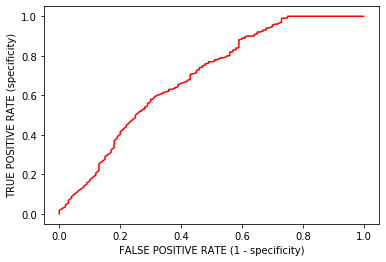

In [399]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('FALSE POSITIVE RATE (1 - specificity)')
plt.ylabel('TRUE POSITIVE RATE (specificity)')
plt.plot(np.array(sorted(fpr)),np.array(sorted(tpr)), color='red')
plt.show()

In [254]:
data.head()

,y_act,proba,pred
0,1.0,0.637387,0
1,1.0,0.635165,0
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [425]:
threshold = data['proba'].values

from tqdm import tqdm
tpr = []
fpr = []
for i in tqdm(threshold):
    data['pred'] = data['proba'].apply(lambda x: 0 if x<i else 1)

    tp,tn,fp,fn = compute_confusion_matrix(data['y_act'],data['pred'])
    tpr_array = (tp) / (tp+fn)
    fpr_array = (fp) / (tn+fp)
    tpr.append(tpr_array)
    fpr.append(fpr_array)
print('AUC_SCORE',np.trapz(np.array(sorted(tpr)),np.array(sorted(fpr))))

    





















  0%|          | 0/10100 [00:00<?, ?it/s]



















  0%|          | 5/10100 [00:00<04:00, 41.99it/s]



















  0%|          | 9/10100 [00:00<04:09, 40.46it/s]



















  0%|          | 13/10100 [00:00<04:11, 40.05it/s]



















  0%|          | 17/10100 [00:00<04:19, 38.88it/s]



















  0%|          | 21/10100 [00:00<04:17, 39.15it/s]



















  0%|          | 25/10100 [00:00<04:22, 38.33it/s]



















  0%|          | 29/10100 [00:00<04:27, 37.60it/s]



















  0%|          | 33/10100 [00:00<04:40, 35.85it/s]



















  0%|          | 37/10100 [00:00<04:36, 36.42it/s]



















  0%|          | 41/10100 [00:01<04:38, 36.15it/s]



















  0%|          | 45/10100 [00:01<04:32, 36.90it/s]



















  0%|          | 49/10100 [00:01<04:35, 36.44it/s]



















  1%|          | 53/10100 [00:01<04:36, 36.30it/s]



















  1%|      

  5%|▍         | 465/10100 [00:13<04:29, 35.75it/s]



















  5%|▍         | 469/10100 [00:13<04:27, 35.96it/s]



















  5%|▍         | 473/10100 [00:13<04:28, 35.85it/s]



















  5%|▍         | 477/10100 [00:13<04:32, 35.32it/s]



















  5%|▍         | 481/10100 [00:13<04:32, 35.34it/s]



















  5%|▍         | 485/10100 [00:13<04:31, 35.37it/s]



















  5%|▍         | 489/10100 [00:14<04:29, 35.67it/s]



















  5%|▍         | 493/10100 [00:14<04:25, 36.17it/s]



















  5%|▍         | 497/10100 [00:14<04:25, 36.15it/s]



















  5%|▍         | 501/10100 [00:14<04:24, 36.29it/s]



















  5%|▌         | 505/10100 [00:14<04:30, 35.50it/s]



















  5%|▌         | 509/10100 [00:14<04:54, 32.58it/s]



















  5%|▌         | 513/10100 [00:14<05:12, 30.67it/s]



















  5%|▌         | 517/10100 [00:14<05:23, 29.59it/s]



















  5%|▌

  9%|▉         | 930/10100 [00:26<05:23, 28.34it/s]



















  9%|▉         | 934/10100 [00:26<04:59, 30.61it/s]



















  9%|▉         | 938/10100 [00:26<04:44, 32.18it/s]



















  9%|▉         | 943/10100 [00:26<04:26, 34.39it/s]



















  9%|▉         | 947/10100 [00:26<04:22, 34.80it/s]



















  9%|▉         | 951/10100 [00:27<04:18, 35.45it/s]



















  9%|▉         | 955/10100 [00:27<04:14, 35.92it/s]



















  9%|▉         | 959/10100 [00:27<04:13, 36.03it/s]



















 10%|▉         | 963/10100 [00:27<04:12, 36.15it/s]



















 10%|▉         | 967/10100 [00:27<04:07, 36.83it/s]



















 10%|▉         | 971/10100 [00:27<04:07, 36.94it/s]



















 10%|▉         | 975/10100 [00:27<04:08, 36.65it/s]



















 10%|▉         | 979/10100 [00:27<04:04, 37.26it/s]



















 10%|▉         | 983/10100 [00:27<04:04, 37.23it/s]



















 10%|▉

 14%|█▍        | 1399/10100 [00:39<03:42, 39.10it/s]



















 14%|█▍        | 1404/10100 [00:39<03:38, 39.84it/s]



















 14%|█▍        | 1408/10100 [00:39<03:42, 39.09it/s]



















 14%|█▍        | 1412/10100 [00:39<03:45, 38.56it/s]



















 14%|█▍        | 1416/10100 [00:39<03:45, 38.49it/s]



















 14%|█▍        | 1420/10100 [00:39<03:48, 37.98it/s]



















 14%|█▍        | 1424/10100 [00:39<03:46, 38.22it/s]



















 14%|█▍        | 1428/10100 [00:40<03:52, 37.23it/s]



















 14%|█▍        | 1432/10100 [00:40<03:58, 36.29it/s]



















 14%|█▍        | 1436/10100 [00:40<03:59, 36.17it/s]



















 14%|█▍        | 1440/10100 [00:40<03:57, 36.41it/s]



















 14%|█▍        | 1444/10100 [00:40<03:53, 37.03it/s]



















 14%|█▍        | 1448/10100 [00:40<03:52, 37.21it/s]



















 14%|█▍        | 1453/10100 [00:40<03:36, 39.97it/s]













 19%|█▊        | 1880/10100 [00:52<03:44, 36.60it/s]



















 19%|█▊        | 1884/10100 [00:52<03:47, 36.14it/s]



















 19%|█▊        | 1888/10100 [00:52<03:50, 35.69it/s]



















 19%|█▊        | 1892/10100 [00:52<03:49, 35.84it/s]



















 19%|█▉        | 1896/10100 [00:52<03:48, 35.93it/s]



















 19%|█▉        | 1900/10100 [00:52<03:46, 36.21it/s]



















 19%|█▉        | 1904/10100 [00:52<03:52, 35.25it/s]



















 19%|█▉        | 1908/10100 [00:53<03:52, 35.26it/s]



















 19%|█▉        | 1912/10100 [00:53<03:49, 35.72it/s]



















 19%|█▉        | 1916/10100 [00:53<03:47, 35.94it/s]



















 19%|█▉        | 1920/10100 [00:53<03:45, 36.26it/s]



















 19%|█▉        | 1924/10100 [00:53<03:51, 35.34it/s]



















 19%|█▉        | 1928/10100 [00:53<03:58, 34.30it/s]



















 19%|█▉        | 1932/10100 [00:53<04:23, 30.94it/s]













 23%|██▎       | 2338/10100 [01:05<04:02, 32.07it/s]



















 23%|██▎       | 2342/10100 [01:05<03:52, 33.38it/s]



















 23%|██▎       | 2346/10100 [01:05<03:52, 33.29it/s]



















 23%|██▎       | 2350/10100 [01:05<03:57, 32.68it/s]



















 23%|██▎       | 2354/10100 [01:06<04:00, 32.26it/s]



















 23%|██▎       | 2358/10100 [01:06<03:55, 32.90it/s]



















 23%|██▎       | 2362/10100 [01:06<03:47, 33.97it/s]



















 23%|██▎       | 2366/10100 [01:06<03:42, 34.71it/s]



















 23%|██▎       | 2370/10100 [01:06<03:48, 33.84it/s]



















 24%|██▎       | 2374/10100 [01:06<03:52, 33.29it/s]



















 24%|██▎       | 2378/10100 [01:06<03:46, 34.07it/s]



















 24%|██▎       | 2382/10100 [01:06<03:42, 34.70it/s]



















 24%|██▎       | 2386/10100 [01:07<03:41, 34.78it/s]



















 24%|██▎       | 2390/10100 [01:07<03:45, 34.23it/s]













 28%|██▊       | 2799/10100 [01:19<03:19, 36.63it/s]



















 28%|██▊       | 2803/10100 [01:19<03:16, 37.14it/s]



















 28%|██▊       | 2807/10100 [01:19<03:20, 36.46it/s]



















 28%|██▊       | 2811/10100 [01:19<03:28, 34.94it/s]



















 28%|██▊       | 2815/10100 [01:19<03:28, 34.96it/s]



















 28%|██▊       | 2819/10100 [01:19<03:23, 35.83it/s]



















 28%|██▊       | 2823/10100 [01:19<03:22, 35.99it/s]



















 28%|██▊       | 2827/10100 [01:19<03:20, 36.19it/s]



















 28%|██▊       | 2831/10100 [01:19<03:20, 36.29it/s]



















 28%|██▊       | 2835/10100 [01:20<03:20, 36.22it/s]



















 28%|██▊       | 2839/10100 [01:20<03:17, 36.83it/s]



















 28%|██▊       | 2843/10100 [01:20<03:18, 36.62it/s]



















 28%|██▊       | 2847/10100 [01:20<03:18, 36.62it/s]



















 28%|██▊       | 2851/10100 [01:20<03:13, 37.53it/s]













 32%|███▏      | 3265/10100 [01:31<03:02, 37.39it/s]



















 32%|███▏      | 3269/10100 [01:31<03:00, 37.79it/s]



















 32%|███▏      | 3273/10100 [01:32<03:04, 37.07it/s]



















 32%|███▏      | 3277/10100 [01:32<03:03, 37.09it/s]



















 32%|███▏      | 3281/10100 [01:32<03:03, 37.23it/s]



















 33%|███▎      | 3285/10100 [01:32<03:11, 35.60it/s]



















 33%|███▎      | 3289/10100 [01:32<03:28, 32.70it/s]



















 33%|███▎      | 3293/10100 [01:32<03:33, 31.89it/s]



















 33%|███▎      | 3297/10100 [01:32<03:38, 31.14it/s]



















 33%|███▎      | 3301/10100 [01:32<03:44, 30.32it/s]



















 33%|███▎      | 3305/10100 [01:33<03:34, 31.66it/s]



















 33%|███▎      | 3310/10100 [01:33<03:21, 33.71it/s]



















 33%|███▎      | 3314/10100 [01:33<03:17, 34.31it/s]



















 33%|███▎      | 3318/10100 [01:33<03:12, 35.31it/s]













 37%|███▋      | 3723/10100 [01:44<02:51, 37.10it/s]



















 37%|███▋      | 3727/10100 [01:44<02:54, 36.47it/s]



















 37%|███▋      | 3731/10100 [01:45<02:52, 36.82it/s]



















 37%|███▋      | 3735/10100 [01:45<02:56, 36.02it/s]



















 37%|███▋      | 3739/10100 [01:45<03:15, 32.56it/s]



















 37%|███▋      | 3743/10100 [01:45<03:16, 32.35it/s]



















 37%|███▋      | 3747/10100 [01:45<03:15, 32.45it/s]



















 37%|███▋      | 3751/10100 [01:45<03:13, 32.86it/s]



















 37%|███▋      | 3755/10100 [01:45<03:10, 33.37it/s]



















 37%|███▋      | 3759/10100 [01:45<03:08, 33.55it/s]



















 37%|███▋      | 3763/10100 [01:46<03:12, 32.91it/s]



















 37%|███▋      | 3767/10100 [01:46<03:09, 33.40it/s]



















 37%|███▋      | 3771/10100 [01:46<03:10, 33.17it/s]



















 37%|███▋      | 3775/10100 [01:46<03:02, 34.67it/s]













 41%|████▏     | 4184/10100 [01:57<02:41, 36.63it/s]



















 41%|████▏     | 4188/10100 [01:57<02:39, 37.04it/s]



















 42%|████▏     | 4192/10100 [01:58<02:40, 36.75it/s]



















 42%|████▏     | 4196/10100 [01:58<02:40, 36.74it/s]



















 42%|████▏     | 4200/10100 [01:58<02:41, 36.51it/s]



















 42%|████▏     | 4204/10100 [01:58<02:41, 36.58it/s]



















 42%|████▏     | 4208/10100 [01:58<02:40, 36.71it/s]



















 42%|████▏     | 4212/10100 [01:58<02:39, 36.86it/s]



















 42%|████▏     | 4216/10100 [01:58<02:37, 37.31it/s]



















 42%|████▏     | 4220/10100 [01:58<02:38, 37.00it/s]



















 42%|████▏     | 4224/10100 [01:58<02:40, 36.72it/s]



















 42%|████▏     | 4228/10100 [01:59<02:40, 36.60it/s]



















 42%|████▏     | 4232/10100 [01:59<02:40, 36.64it/s]



















 42%|████▏     | 4236/10100 [01:59<02:38, 37.03it/s]













 46%|████▌     | 4655/10100 [02:10<02:23, 37.93it/s]



















 46%|████▌     | 4659/10100 [02:10<02:24, 37.65it/s]



















 46%|████▌     | 4663/10100 [02:11<02:23, 37.95it/s]



















 46%|████▌     | 4667/10100 [02:11<02:22, 38.08it/s]



















 46%|████▌     | 4671/10100 [02:11<02:24, 37.56it/s]



















 46%|████▋     | 4675/10100 [02:11<02:39, 33.96it/s]



















 46%|████▋     | 4679/10100 [02:11<02:55, 30.93it/s]



















 46%|████▋     | 4683/10100 [02:11<03:07, 28.93it/s]



















 46%|████▋     | 4686/10100 [02:11<03:09, 28.52it/s]



















 46%|████▋     | 4690/10100 [02:11<02:56, 30.59it/s]



















 46%|████▋     | 4694/10100 [02:12<02:48, 32.18it/s]



















 47%|████▋     | 4698/10100 [02:12<02:41, 33.55it/s]



















 47%|████▋     | 4702/10100 [02:12<02:39, 33.75it/s]



















 47%|████▋     | 4706/10100 [02:12<02:40, 33.65it/s]













 51%|█████     | 5119/10100 [02:24<02:08, 38.66it/s]



















 51%|█████     | 5123/10100 [02:24<02:10, 38.02it/s]



















 51%|█████     | 5127/10100 [02:24<02:10, 38.17it/s]



















 51%|█████     | 5131/10100 [02:24<02:11, 37.65it/s]



















 51%|█████     | 5135/10100 [02:24<02:09, 38.31it/s]



















 51%|█████     | 5139/10100 [02:24<02:10, 37.88it/s]



















 51%|█████     | 5143/10100 [02:24<02:12, 37.42it/s]



















 51%|█████     | 5147/10100 [02:24<02:13, 37.18it/s]



















 51%|█████     | 5151/10100 [02:24<02:16, 36.37it/s]



















 51%|█████     | 5155/10100 [02:25<02:14, 36.73it/s]



















 51%|█████     | 5159/10100 [02:25<02:14, 36.67it/s]



















 51%|█████     | 5163/10100 [02:25<02:11, 37.60it/s]



















 51%|█████     | 5167/10100 [02:25<02:12, 37.36it/s]



















 51%|█████     | 5171/10100 [02:25<02:13, 37.01it/s]













 55%|█████▌    | 5579/10100 [02:37<02:00, 37.44it/s]



















 55%|█████▌    | 5583/10100 [02:37<02:02, 36.74it/s]



















 55%|█████▌    | 5587/10100 [02:37<02:02, 36.70it/s]



















 55%|█████▌    | 5591/10100 [02:37<02:03, 36.55it/s]



















 55%|█████▌    | 5595/10100 [02:37<02:05, 35.98it/s]



















 55%|█████▌    | 5599/10100 [02:37<02:01, 37.02it/s]



















 55%|█████▌    | 5603/10100 [02:37<02:06, 35.56it/s]



















 56%|█████▌    | 5607/10100 [02:37<02:06, 35.64it/s]



















 56%|█████▌    | 5611/10100 [02:38<02:08, 35.02it/s]



















 56%|█████▌    | 5615/10100 [02:38<02:04, 35.95it/s]



















 56%|█████▌    | 5619/10100 [02:38<02:04, 35.92it/s]



















 56%|█████▌    | 5623/10100 [02:38<02:05, 35.56it/s]



















 56%|█████▌    | 5627/10100 [02:38<02:04, 35.82it/s]



















 56%|█████▌    | 5631/10100 [02:38<02:02, 36.58it/s]













 60%|█████▉    | 6045/10100 [02:50<02:02, 33.13it/s]



















 60%|█████▉    | 6049/10100 [02:50<01:58, 34.24it/s]



















 60%|█████▉    | 6053/10100 [02:50<01:53, 35.66it/s]



















 60%|█████▉    | 6057/10100 [02:50<02:15, 29.76it/s]



















 60%|██████    | 6061/10100 [02:50<02:22, 28.27it/s]



















 60%|██████    | 6064/10100 [02:50<02:25, 27.76it/s]



















 60%|██████    | 6067/10100 [02:50<02:27, 27.35it/s]



















 60%|██████    | 6070/10100 [02:51<02:25, 27.75it/s]



















 60%|██████    | 6074/10100 [02:51<02:14, 30.02it/s]



















 60%|██████    | 6078/10100 [02:51<02:06, 31.83it/s]



















 60%|██████    | 6082/10100 [02:51<01:59, 33.57it/s]



















 60%|██████    | 6086/10100 [02:51<01:57, 34.02it/s]



















 60%|██████    | 6090/10100 [02:51<01:54, 35.01it/s]



















 60%|██████    | 6094/10100 [02:51<01:52, 35.53it/s]













 64%|██████▍   | 6509/10100 [03:03<01:34, 38.00it/s]



















 64%|██████▍   | 6513/10100 [03:03<01:35, 37.52it/s]



















 65%|██████▍   | 6517/10100 [03:03<01:36, 37.10it/s]



















 65%|██████▍   | 6521/10100 [03:03<01:36, 37.03it/s]



















 65%|██████▍   | 6525/10100 [03:03<01:38, 36.25it/s]



















 65%|██████▍   | 6529/10100 [03:03<01:37, 36.46it/s]



















 65%|██████▍   | 6533/10100 [03:03<01:37, 36.60it/s]



















 65%|██████▍   | 6537/10100 [03:03<01:36, 36.74it/s]



















 65%|██████▍   | 6541/10100 [03:03<01:36, 36.83it/s]



















 65%|██████▍   | 6545/10100 [03:04<01:38, 36.23it/s]



















 65%|██████▍   | 6549/10100 [03:04<01:37, 36.55it/s]



















 65%|██████▍   | 6553/10100 [03:04<01:36, 36.90it/s]



















 65%|██████▍   | 6557/10100 [03:04<01:35, 36.99it/s]



















 65%|██████▍   | 6561/10100 [03:04<01:35, 37.05it/s]













 69%|██████▉   | 6989/10100 [03:16<01:22, 37.75it/s]



















 69%|██████▉   | 6993/10100 [03:16<01:21, 37.92it/s]



















 69%|██████▉   | 6997/10100 [03:16<01:22, 37.47it/s]



















 69%|██████▉   | 7001/10100 [03:16<01:24, 36.50it/s]



















 69%|██████▉   | 7005/10100 [03:16<01:27, 35.43it/s]



















 69%|██████▉   | 7009/10100 [03:16<01:26, 35.74it/s]



















 69%|██████▉   | 7013/10100 [03:16<01:26, 35.89it/s]



















 69%|██████▉   | 7017/10100 [03:16<01:26, 35.45it/s]



















 70%|██████▉   | 7021/10100 [03:16<01:28, 34.97it/s]



















 70%|██████▉   | 7025/10100 [03:17<01:28, 34.64it/s]



















 70%|██████▉   | 7029/10100 [03:17<01:27, 35.21it/s]



















 70%|██████▉   | 7033/10100 [03:17<01:26, 35.42it/s]



















 70%|██████▉   | 7037/10100 [03:17<01:25, 35.81it/s]



















 70%|██████▉   | 7041/10100 [03:17<01:25, 35.80it/s]













 74%|███████▍  | 7465/10100 [03:28<01:09, 37.88it/s]



















 74%|███████▍  | 7470/10100 [03:29<01:08, 38.56it/s]



















 74%|███████▍  | 7474/10100 [03:29<01:08, 38.38it/s]



















 74%|███████▍  | 7478/10100 [03:29<01:14, 35.43it/s]



















 74%|███████▍  | 7482/10100 [03:29<01:18, 33.54it/s]



















 74%|███████▍  | 7486/10100 [03:29<01:23, 31.34it/s]



















 74%|███████▍  | 7490/10100 [03:29<01:23, 31.14it/s]



















 74%|███████▍  | 7494/10100 [03:29<01:23, 31.32it/s]



















 74%|███████▍  | 7498/10100 [03:29<01:19, 32.69it/s]



















 74%|███████▍  | 7503/10100 [03:30<01:15, 34.53it/s]



















 74%|███████▍  | 7507/10100 [03:30<01:12, 35.59it/s]



















 74%|███████▍  | 7511/10100 [03:30<01:12, 35.92it/s]



















 74%|███████▍  | 7515/10100 [03:30<01:11, 36.38it/s]



















 74%|███████▍  | 7519/10100 [03:30<01:10, 36.49it/s]













 79%|███████▊  | 7939/10100 [03:42<00:56, 37.97it/s]



















 79%|███████▊  | 7944/10100 [03:42<00:55, 38.73it/s]



















 79%|███████▊  | 7948/10100 [03:42<00:57, 37.42it/s]



















 79%|███████▊  | 7952/10100 [03:42<00:56, 38.06it/s]



















 79%|███████▉  | 7956/10100 [03:42<00:58, 36.84it/s]



















 79%|███████▉  | 7960/10100 [03:42<00:57, 37.11it/s]



















 79%|███████▉  | 7964/10100 [03:42<00:58, 36.28it/s]



















 79%|███████▉  | 7968/10100 [03:42<00:57, 36.92it/s]



















 79%|███████▉  | 7972/10100 [03:42<00:57, 36.93it/s]



















 79%|███████▉  | 7976/10100 [03:43<00:57, 36.84it/s]



















 79%|███████▉  | 7980/10100 [03:43<00:57, 36.71it/s]



















 79%|███████▉  | 7984/10100 [03:43<00:57, 36.89it/s]



















 79%|███████▉  | 7988/10100 [03:43<00:56, 37.47it/s]



















 79%|███████▉  | 7992/10100 [03:43<00:56, 37.06it/s]













 83%|████████▎ | 8411/10100 [03:54<00:43, 38.68it/s]



















 83%|████████▎ | 8416/10100 [03:55<00:42, 39.32it/s]



















 83%|████████▎ | 8420/10100 [03:55<00:43, 38.48it/s]



















 83%|████████▎ | 8424/10100 [03:55<00:44, 37.85it/s]



















 83%|████████▎ | 8428/10100 [03:55<00:44, 37.38it/s]



















 83%|████████▎ | 8432/10100 [03:55<00:44, 37.39it/s]



















 84%|████████▎ | 8436/10100 [03:55<00:44, 37.73it/s]



















 84%|████████▎ | 8440/10100 [03:55<00:44, 37.40it/s]



















 84%|████████▎ | 8444/10100 [03:55<00:44, 36.90it/s]



















 84%|████████▎ | 8448/10100 [03:55<00:45, 36.52it/s]



















 84%|████████▎ | 8452/10100 [03:56<00:43, 37.48it/s]



















 84%|████████▎ | 8456/10100 [03:56<00:44, 37.08it/s]



















 84%|████████▍ | 8460/10100 [03:56<00:44, 36.89it/s]



















 84%|████████▍ | 8464/10100 [03:56<00:43, 37.18it/s]













 88%|████████▊ | 8887/10100 [04:07<00:30, 39.14it/s]



















 88%|████████▊ | 8891/10100 [04:07<00:31, 38.39it/s]



















 88%|████████▊ | 8895/10100 [04:08<00:31, 37.88it/s]



















 88%|████████▊ | 8899/10100 [04:08<00:35, 33.68it/s]



















 88%|████████▊ | 8903/10100 [04:08<00:37, 31.84it/s]



















 88%|████████▊ | 8907/10100 [04:08<00:39, 30.09it/s]



















 88%|████████▊ | 8911/10100 [04:08<00:41, 28.49it/s]



















 88%|████████▊ | 8915/10100 [04:08<00:39, 30.32it/s]



















 88%|████████▊ | 8919/10100 [04:08<00:38, 30.60it/s]



















 88%|████████▊ | 8923/10100 [04:08<00:37, 31.51it/s]



















 88%|████████▊ | 8927/10100 [04:09<00:38, 30.50it/s]



















 88%|████████▊ | 8931/10100 [04:09<00:36, 31.84it/s]



















 88%|████████▊ | 8935/10100 [04:09<00:36, 32.22it/s]



















 89%|████████▊ | 8939/10100 [04:09<00:38, 29.79it/s]













 93%|█████████▎| 9359/10100 [04:21<00:20, 35.90it/s]



















 93%|█████████▎| 9363/10100 [04:21<00:20, 36.36it/s]



















 93%|█████████▎| 9367/10100 [04:21<00:20, 36.10it/s]



















 93%|█████████▎| 9371/10100 [04:21<00:20, 36.41it/s]



















 93%|█████████▎| 9375/10100 [04:21<00:19, 36.62it/s]



















 93%|█████████▎| 9379/10100 [04:21<00:19, 36.70it/s]



















 93%|█████████▎| 9383/10100 [04:21<00:19, 35.90it/s]



















 93%|█████████▎| 9387/10100 [04:21<00:19, 36.42it/s]



















 93%|█████████▎| 9391/10100 [04:21<00:19, 36.25it/s]



















 93%|█████████▎| 9395/10100 [04:22<00:19, 36.42it/s]



















 93%|█████████▎| 9399/10100 [04:22<00:19, 36.40it/s]



















 93%|█████████▎| 9403/10100 [04:22<00:19, 36.48it/s]



















 93%|█████████▎| 9407/10100 [04:22<00:18, 37.37it/s]



















 93%|█████████▎| 9411/10100 [04:22<00:18, 37.07it/s]













 98%|█████████▊| 9848/10100 [04:34<00:06, 39.96it/s]



















 98%|█████████▊| 9853/10100 [04:34<00:06, 39.23it/s]



















 98%|█████████▊| 9857/10100 [04:34<00:06, 39.14it/s]



















 98%|█████████▊| 9861/10100 [04:34<00:06, 38.25it/s]



















 98%|█████████▊| 9865/10100 [04:34<00:06, 38.66it/s]



















 98%|█████████▊| 9869/10100 [04:34<00:06, 37.94it/s]



















 98%|█████████▊| 9873/10100 [04:35<00:05, 37.87it/s]



















 98%|█████████▊| 9877/10100 [04:35<00:05, 38.12it/s]



















 98%|█████████▊| 9881/10100 [04:35<00:05, 38.16it/s]



















 98%|█████████▊| 9885/10100 [04:35<00:05, 37.93it/s]



















 98%|█████████▊| 9889/10100 [04:35<00:05, 37.53it/s]



















 98%|█████████▊| 9893/10100 [04:35<00:05, 37.40it/s]



















 98%|█████████▊| 9897/10100 [04:35<00:05, 38.02it/s]



















 98%|█████████▊| 9901/10100 [04:35<00:05, 37.39it/s]













AUC_SCORE 0.48829900000000004


In [427]:
threshold = data['proba'].values
sorted_threshold = sorted(threshold, reverse = True)
from tqdm import tqdm
tpr = []
fpr = []
for i in tqdm(sorted_threshold):
    data['pred'] = data['proba'].apply(lambda x: 0 if x<i else 1)

    tp,tn,fp,fn = compute_confusion_matrix(data['y_act'],data['pred'])
    tpr_array = (tp) / (tp+fn)
    fpr_array = (fp) / (tn+fp)
    tpr.append(tpr_array)
    fpr.append(fpr_array)
print('AUC_SCORE',np.trapz(np.array(sorted(tpr)),np.array(sorted(fpr))))

    





















  0%|          | 0/10100 [00:00<?, ?it/s]



















  0%|          | 5/10100 [00:00<03:25, 49.09it/s]



















  0%|          | 9/10100 [00:00<03:40, 45.80it/s]



















  0%|          | 13/10100 [00:00<03:52, 43.31it/s]



















  0%|          | 18/10100 [00:00<03:57, 42.42it/s]



















  0%|          | 22/10100 [00:00<04:04, 41.24it/s]



















  0%|          | 26/10100 [00:00<04:13, 39.69it/s]



















  0%|          | 30/10100 [00:00<04:19, 38.84it/s]



















  0%|          | 34/10100 [00:00<04:18, 39.01it/s]



















  0%|          | 38/10100 [00:00<04:29, 37.36it/s]



















  0%|          | 42/10100 [00:01<04:52, 34.39it/s]



















  0%|          | 46/10100 [00:01<05:23, 31.09it/s]



















  0%|          | 50/10100 [00:01<05:36, 29.89it/s]



















  1%|          | 54/10100 [00:01<05:32, 30.18it/s]



















  1%|      

  5%|▍         | 466/10100 [00:13<04:58, 32.33it/s]



















  5%|▍         | 470/10100 [00:13<04:42, 34.07it/s]



















  5%|▍         | 474/10100 [00:13<04:36, 34.82it/s]



















  5%|▍         | 478/10100 [00:13<04:27, 35.95it/s]



















  5%|▍         | 482/10100 [00:13<04:20, 36.97it/s]



















  5%|▍         | 486/10100 [00:13<04:18, 37.22it/s]



















  5%|▍         | 490/10100 [00:13<04:16, 37.46it/s]



















  5%|▍         | 494/10100 [00:13<04:17, 37.29it/s]



















  5%|▍         | 498/10100 [00:14<04:15, 37.60it/s]



















  5%|▍         | 502/10100 [00:14<04:24, 36.29it/s]



















  5%|▌         | 506/10100 [00:14<04:27, 35.80it/s]



















  5%|▌         | 510/10100 [00:14<04:31, 35.35it/s]



















  5%|▌         | 514/10100 [00:14<04:33, 35.08it/s]



















  5%|▌         | 518/10100 [00:14<04:30, 35.41it/s]



















  5%|▌

  9%|▉         | 940/10100 [00:25<04:01, 37.91it/s]



















  9%|▉         | 945/10100 [00:26<03:57, 38.50it/s]



















  9%|▉         | 949/10100 [00:26<03:58, 38.35it/s]



















  9%|▉         | 953/10100 [00:26<04:00, 37.96it/s]



















  9%|▉         | 957/10100 [00:26<03:59, 38.17it/s]



















 10%|▉         | 961/10100 [00:26<03:59, 38.18it/s]



















 10%|▉         | 965/10100 [00:26<04:02, 37.64it/s]



















 10%|▉         | 969/10100 [00:26<03:58, 38.21it/s]



















 10%|▉         | 974/10100 [00:26<03:45, 40.40it/s]



















 10%|▉         | 980/10100 [00:26<03:30, 43.31it/s]



















 10%|▉         | 985/10100 [00:27<03:24, 44.52it/s]



















 10%|▉         | 990/10100 [00:27<03:19, 45.76it/s]



















 10%|▉         | 995/10100 [00:27<03:21, 45.08it/s]



















 10%|▉         | 1000/10100 [00:27<03:41, 41.09it/s]



















 10%|

 14%|█▍        | 1434/10100 [00:38<03:42, 38.96it/s]



















 14%|█▍        | 1439/10100 [00:39<03:42, 38.95it/s]



















 14%|█▍        | 1443/10100 [00:39<03:44, 38.52it/s]



















 14%|█▍        | 1447/10100 [00:39<03:48, 37.84it/s]



















 14%|█▍        | 1451/10100 [00:39<03:46, 38.11it/s]



















 14%|█▍        | 1455/10100 [00:39<03:50, 37.49it/s]



















 14%|█▍        | 1459/10100 [00:39<03:49, 37.60it/s]



















 14%|█▍        | 1463/10100 [00:39<03:54, 36.84it/s]



















 15%|█▍        | 1467/10100 [00:39<03:51, 37.35it/s]



















 15%|█▍        | 1471/10100 [00:39<04:08, 34.72it/s]



















 15%|█▍        | 1475/10100 [00:40<04:27, 32.20it/s]



















 15%|█▍        | 1479/10100 [00:40<04:39, 30.90it/s]



















 15%|█▍        | 1483/10100 [00:40<04:36, 31.14it/s]



















 15%|█▍        | 1487/10100 [00:40<04:24, 32.55it/s]













 19%|█▉        | 1916/10100 [00:51<03:49, 35.68it/s]



















 19%|█▉        | 1920/10100 [00:51<03:43, 36.62it/s]



















 19%|█▉        | 1924/10100 [00:51<03:42, 36.67it/s]



















 19%|█▉        | 1928/10100 [00:52<03:43, 36.57it/s]



















 19%|█▉        | 1932/10100 [00:52<03:40, 37.11it/s]



















 19%|█▉        | 1936/10100 [00:52<03:41, 36.90it/s]



















 19%|█▉        | 1940/10100 [00:52<03:40, 37.03it/s]



















 19%|█▉        | 1944/10100 [00:52<03:37, 37.48it/s]



















 19%|█▉        | 1948/10100 [00:52<03:39, 37.07it/s]



















 19%|█▉        | 1952/10100 [00:52<03:37, 37.45it/s]



















 19%|█▉        | 1956/10100 [00:52<03:38, 37.20it/s]



















 19%|█▉        | 1960/10100 [00:52<03:34, 37.88it/s]



















 19%|█▉        | 1964/10100 [00:53<03:36, 37.58it/s]



















 19%|█▉        | 1968/10100 [00:53<03:36, 37.57it/s]













 24%|██▎       | 2392/10100 [01:04<03:25, 37.42it/s]



















 24%|██▎       | 2397/10100 [01:04<03:18, 38.81it/s]



















 24%|██▍       | 2401/10100 [01:04<03:20, 38.39it/s]



















 24%|██▍       | 2405/10100 [01:04<03:23, 37.88it/s]



















 24%|██▍       | 2410/10100 [01:04<03:17, 38.93it/s]



















 24%|██▍       | 2414/10100 [01:05<03:21, 38.14it/s]



















 24%|██▍       | 2418/10100 [01:05<03:19, 38.58it/s]



















 24%|██▍       | 2422/10100 [01:05<03:21, 38.07it/s]



















 24%|██▍       | 2426/10100 [01:05<03:19, 38.42it/s]



















 24%|██▍       | 2430/10100 [01:05<03:21, 38.07it/s]



















 24%|██▍       | 2435/10100 [01:05<03:17, 38.81it/s]



















 24%|██▍       | 2439/10100 [01:05<03:20, 38.28it/s]



















 24%|██▍       | 2443/10100 [01:05<03:23, 37.71it/s]



















 24%|██▍       | 2447/10100 [01:05<03:19, 38.27it/s]













 28%|██▊       | 2871/10100 [01:17<03:03, 39.47it/s]



















 28%|██▊       | 2875/10100 [01:17<03:02, 39.57it/s]



















 29%|██▊       | 2879/10100 [01:17<03:10, 37.96it/s]



















 29%|██▊       | 2883/10100 [01:17<03:10, 37.96it/s]



















 29%|██▊       | 2887/10100 [01:17<03:12, 37.56it/s]



















 29%|██▊       | 2891/10100 [01:17<03:11, 37.55it/s]



















 29%|██▊       | 2895/10100 [01:17<03:09, 38.02it/s]



















 29%|██▊       | 2899/10100 [01:18<03:10, 37.71it/s]



















 29%|██▊       | 2903/10100 [01:18<03:09, 38.06it/s]



















 29%|██▉       | 2907/10100 [01:18<03:14, 37.00it/s]



















 29%|██▉       | 2911/10100 [01:18<03:15, 36.71it/s]



















 29%|██▉       | 2915/10100 [01:18<03:16, 36.66it/s]



















 29%|██▉       | 2919/10100 [01:18<03:28, 34.42it/s]



















 29%|██▉       | 2923/10100 [01:18<03:44, 31.99it/s]













 33%|███▎      | 3347/10100 [01:30<03:22, 33.31it/s]



















 33%|███▎      | 3351/10100 [01:30<03:14, 34.67it/s]



















 33%|███▎      | 3355/10100 [01:30<03:11, 35.23it/s]



















 33%|███▎      | 3359/10100 [01:30<03:07, 35.91it/s]



















 33%|███▎      | 3363/10100 [01:30<03:03, 36.66it/s]



















 33%|███▎      | 3368/10100 [01:30<02:52, 39.00it/s]



















 33%|███▎      | 3373/10100 [01:30<02:42, 41.29it/s]



















 33%|███▎      | 3378/10100 [01:30<02:37, 42.80it/s]



















 33%|███▎      | 3383/10100 [01:30<02:30, 44.56it/s]



















 34%|███▎      | 3388/10100 [01:31<02:35, 43.11it/s]



















 34%|███▎      | 3393/10100 [01:31<02:44, 40.76it/s]



















 34%|███▎      | 3398/10100 [01:31<02:52, 38.78it/s]



















 34%|███▎      | 3402/10100 [01:31<02:54, 38.36it/s]



















 34%|███▎      | 3406/10100 [01:31<02:58, 37.53it/s]













 38%|███▊      | 3823/10100 [01:42<02:47, 37.49it/s]



















 38%|███▊      | 3827/10100 [01:42<02:44, 38.10it/s]



















 38%|███▊      | 3831/10100 [01:42<02:49, 36.95it/s]



















 38%|███▊      | 3835/10100 [01:43<02:51, 36.56it/s]



















 38%|███▊      | 3839/10100 [01:43<02:51, 36.52it/s]



















 38%|███▊      | 3843/10100 [01:43<02:52, 36.23it/s]



















 38%|███▊      | 3847/10100 [01:43<02:52, 36.34it/s]



















 38%|███▊      | 3851/10100 [01:43<02:54, 35.86it/s]



















 38%|███▊      | 3855/10100 [01:43<02:53, 35.93it/s]



















 38%|███▊      | 3859/10100 [01:43<02:54, 35.81it/s]



















 38%|███▊      | 3863/10100 [01:43<02:54, 35.82it/s]



















 38%|███▊      | 3867/10100 [01:44<02:54, 35.80it/s]



















 38%|███▊      | 3871/10100 [01:44<02:52, 36.08it/s]



















 38%|███▊      | 3875/10100 [01:44<02:51, 36.28it/s]













 43%|████▎     | 4294/10100 [01:55<02:37, 36.87it/s]



















 43%|████▎     | 4298/10100 [01:55<02:38, 36.55it/s]



















 43%|████▎     | 4302/10100 [01:56<02:39, 36.29it/s]



















 43%|████▎     | 4306/10100 [01:56<02:43, 35.50it/s]



















 43%|████▎     | 4310/10100 [01:56<02:43, 35.52it/s]



















 43%|████▎     | 4314/10100 [01:56<02:47, 34.55it/s]



















 43%|████▎     | 4318/10100 [01:56<02:49, 34.15it/s]



















 43%|████▎     | 4322/10100 [01:56<02:50, 33.91it/s]



















 43%|████▎     | 4326/10100 [01:56<02:49, 34.10it/s]



















 43%|████▎     | 4330/10100 [01:56<02:47, 34.38it/s]



















 43%|████▎     | 4334/10100 [01:57<02:55, 32.93it/s]



















 43%|████▎     | 4338/10100 [01:57<02:59, 32.17it/s]



















 43%|████▎     | 4342/10100 [01:57<03:00, 31.95it/s]



















 43%|████▎     | 4346/10100 [01:57<03:07, 30.65it/s]













 47%|████▋     | 4760/10100 [02:08<02:32, 35.02it/s]



















 47%|████▋     | 4764/10100 [02:09<02:30, 35.53it/s]



















 47%|████▋     | 4768/10100 [02:09<02:27, 36.11it/s]



















 47%|████▋     | 4772/10100 [02:09<02:26, 36.38it/s]



















 47%|████▋     | 4776/10100 [02:09<02:25, 36.69it/s]



















 47%|████▋     | 4780/10100 [02:09<02:23, 37.19it/s]



















 47%|████▋     | 4784/10100 [02:09<02:25, 36.54it/s]



















 47%|████▋     | 4788/10100 [02:09<02:23, 37.05it/s]



















 47%|████▋     | 4792/10100 [02:09<02:24, 36.68it/s]



















 47%|████▋     | 4796/10100 [02:09<02:23, 37.00it/s]



















 48%|████▊     | 4800/10100 [02:10<02:25, 36.43it/s]



















 48%|████▊     | 4804/10100 [02:10<02:24, 36.68it/s]



















 48%|████▊     | 4808/10100 [02:10<02:24, 36.70it/s]



















 48%|████▊     | 4812/10100 [02:10<02:25, 36.30it/s]













 52%|█████▏    | 5244/10100 [02:21<01:58, 40.95it/s]



















 52%|█████▏    | 5249/10100 [02:22<02:00, 40.38it/s]



















 52%|█████▏    | 5254/10100 [02:22<02:02, 39.63it/s]



















 52%|█████▏    | 5258/10100 [02:22<02:04, 38.74it/s]



















 52%|█████▏    | 5262/10100 [02:22<02:05, 38.61it/s]



















 52%|█████▏    | 5266/10100 [02:22<02:09, 37.46it/s]



















 52%|█████▏    | 5270/10100 [02:22<02:07, 37.91it/s]



















 52%|█████▏    | 5275/10100 [02:22<02:04, 38.61it/s]



















 52%|█████▏    | 5280/10100 [02:22<02:03, 39.03it/s]



















 52%|█████▏    | 5284/10100 [02:22<02:05, 38.43it/s]



















 52%|█████▏    | 5288/10100 [02:23<02:04, 38.74it/s]



















 52%|█████▏    | 5293/10100 [02:23<02:03, 39.00it/s]



















 52%|█████▏    | 5297/10100 [02:23<02:04, 38.67it/s]



















 52%|█████▏    | 5301/10100 [02:23<02:04, 38.56it/s]













 57%|█████▋    | 5735/10100 [02:34<01:47, 40.79it/s]



















 57%|█████▋    | 5740/10100 [02:34<01:42, 42.45it/s]



















 57%|█████▋    | 5745/10100 [02:35<01:41, 42.93it/s]



















 57%|█████▋    | 5750/10100 [02:35<01:45, 41.35it/s]



















 57%|█████▋    | 5755/10100 [02:35<01:51, 39.13it/s]



















 57%|█████▋    | 5759/10100 [02:35<01:51, 38.92it/s]



















 57%|█████▋    | 5763/10100 [02:35<02:01, 35.67it/s]



















 57%|█████▋    | 5767/10100 [02:35<02:19, 30.99it/s]



















 57%|█████▋    | 5771/10100 [02:35<02:26, 29.49it/s]



















 57%|█████▋    | 5775/10100 [02:36<02:24, 29.93it/s]



















 57%|█████▋    | 5779/10100 [02:36<02:16, 31.75it/s]



















 57%|█████▋    | 5783/10100 [02:36<02:09, 33.31it/s]



















 57%|█████▋    | 5787/10100 [02:36<02:05, 34.27it/s]



















 57%|█████▋    | 5791/10100 [02:36<02:01, 35.39it/s]













 62%|██████▏   | 6213/10100 [02:47<01:47, 36.02it/s]



















 62%|██████▏   | 6217/10100 [02:47<01:47, 36.14it/s]



















 62%|██████▏   | 6221/10100 [02:47<01:45, 36.78it/s]



















 62%|██████▏   | 6225/10100 [02:48<01:48, 35.83it/s]



















 62%|██████▏   | 6229/10100 [02:48<01:46, 36.50it/s]



















 62%|██████▏   | 6233/10100 [02:48<01:45, 36.79it/s]



















 62%|██████▏   | 6237/10100 [02:48<01:44, 36.85it/s]



















 62%|██████▏   | 6241/10100 [02:48<01:44, 37.04it/s]



















 62%|██████▏   | 6245/10100 [02:48<01:43, 37.38it/s]



















 62%|██████▏   | 6249/10100 [02:48<01:43, 37.32it/s]



















 62%|██████▏   | 6253/10100 [02:48<01:41, 37.84it/s]



















 62%|██████▏   | 6257/10100 [02:48<01:41, 37.88it/s]



















 62%|██████▏   | 6261/10100 [02:49<01:41, 37.94it/s]



















 62%|██████▏   | 6265/10100 [02:49<01:42, 37.48it/s]













 66%|██████▋   | 6704/10100 [03:00<01:22, 40.94it/s]



















 66%|██████▋   | 6709/10100 [03:00<01:24, 40.28it/s]



















 66%|██████▋   | 6714/10100 [03:01<01:26, 39.16it/s]



















 67%|██████▋   | 6718/10100 [03:01<01:28, 38.32it/s]



















 67%|██████▋   | 6722/10100 [03:01<01:28, 38.19it/s]



















 67%|██████▋   | 6726/10100 [03:01<01:29, 37.51it/s]



















 67%|██████▋   | 6730/10100 [03:01<01:30, 37.19it/s]



















 67%|██████▋   | 6734/10100 [03:01<01:28, 37.83it/s]



















 67%|██████▋   | 6738/10100 [03:01<01:31, 36.69it/s]



















 67%|██████▋   | 6743/10100 [03:01<01:28, 37.86it/s]



















 67%|██████▋   | 6747/10100 [03:01<01:29, 37.64it/s]



















 67%|██████▋   | 6751/10100 [03:02<01:27, 38.06it/s]



















 67%|██████▋   | 6755/10100 [03:02<01:29, 37.57it/s]



















 67%|██████▋   | 6759/10100 [03:02<01:27, 38.00it/s]













 71%|███████▏  | 7197/10100 [03:14<01:21, 35.56it/s]



















 71%|███████▏  | 7201/10100 [03:14<01:24, 34.36it/s]



















 71%|███████▏  | 7205/10100 [03:14<01:24, 34.16it/s]



















 71%|███████▏  | 7209/10100 [03:14<01:22, 34.91it/s]



















 71%|███████▏  | 7213/10100 [03:14<01:22, 34.79it/s]



















 71%|███████▏  | 7217/10100 [03:14<01:20, 35.91it/s]



















 71%|███████▏  | 7221/10100 [03:14<01:19, 36.31it/s]



















 72%|███████▏  | 7226/10100 [03:14<01:15, 37.86it/s]



















 72%|███████▏  | 7230/10100 [03:15<01:17, 37.04it/s]



















 72%|███████▏  | 7234/10100 [03:15<01:16, 37.44it/s]



















 72%|███████▏  | 7238/10100 [03:15<01:16, 37.52it/s]



















 72%|███████▏  | 7242/10100 [03:15<01:14, 38.18it/s]



















 72%|███████▏  | 7246/10100 [03:15<01:14, 38.11it/s]



















 72%|███████▏  | 7250/10100 [03:15<01:15, 37.60it/s]













 76%|███████▌  | 7676/10100 [03:27<00:57, 41.91it/s]



















 76%|███████▌  | 7681/10100 [03:27<00:59, 40.79it/s]



















 76%|███████▌  | 7686/10100 [03:27<01:00, 39.62it/s]



















 76%|███████▌  | 7690/10100 [03:27<01:00, 39.51it/s]



















 76%|███████▌  | 7695/10100 [03:27<00:59, 40.69it/s]



















 76%|███████▌  | 7700/10100 [03:27<01:00, 39.67it/s]



















 76%|███████▋  | 7704/10100 [03:27<01:00, 39.52it/s]



















 76%|███████▋  | 7708/10100 [03:27<01:01, 38.62it/s]



















 76%|███████▋  | 7712/10100 [03:28<01:01, 38.62it/s]



















 76%|███████▋  | 7717/10100 [03:28<00:59, 39.82it/s]



















 76%|███████▋  | 7721/10100 [03:28<01:00, 39.36it/s]



















 76%|███████▋  | 7725/10100 [03:28<01:02, 37.81it/s]



















 77%|███████▋  | 7729/10100 [03:28<01:04, 36.96it/s]



















 77%|███████▋  | 7733/10100 [03:28<01:04, 36.71it/s]













 81%|████████  | 8159/10100 [03:39<00:55, 35.25it/s]



















 81%|████████  | 8164/10100 [03:39<00:52, 37.05it/s]



















 81%|████████  | 8168/10100 [03:40<00:52, 36.69it/s]



















 81%|████████  | 8173/10100 [03:40<00:50, 38.37it/s]



















 81%|████████  | 8177/10100 [03:40<00:50, 38.30it/s]



















 81%|████████  | 8181/10100 [03:40<00:50, 38.11it/s]



















 81%|████████  | 8186/10100 [03:40<00:46, 41.03it/s]



















 81%|████████  | 8191/10100 [03:40<00:46, 40.71it/s]



















 81%|████████  | 8196/10100 [03:40<00:47, 40.24it/s]



















 81%|████████  | 8201/10100 [03:40<00:47, 39.88it/s]



















 81%|████████  | 8206/10100 [03:41<00:49, 38.49it/s]



















 81%|████████▏ | 8210/10100 [03:41<00:49, 38.12it/s]



















 81%|████████▏ | 8214/10100 [03:41<00:48, 38.49it/s]



















 81%|████████▏ | 8218/10100 [03:41<00:49, 38.19it/s]













 86%|████████▌ | 8647/10100 [03:52<00:43, 33.35it/s]



















 86%|████████▌ | 8651/10100 [03:52<00:42, 34.33it/s]



















 86%|████████▌ | 8655/10100 [03:52<00:40, 35.65it/s]



















 86%|████████▌ | 8659/10100 [03:53<00:40, 35.63it/s]



















 86%|████████▌ | 8663/10100 [03:53<00:39, 36.39it/s]



















 86%|████████▌ | 8667/10100 [03:53<00:39, 36.54it/s]



















 86%|████████▌ | 8671/10100 [03:53<00:38, 37.33it/s]



















 86%|████████▌ | 8675/10100 [03:53<00:38, 37.19it/s]



















 86%|████████▌ | 8679/10100 [03:53<00:37, 37.58it/s]



















 86%|████████▌ | 8683/10100 [03:53<00:37, 37.60it/s]



















 86%|████████▌ | 8687/10100 [03:53<00:37, 37.20it/s]



















 86%|████████▌ | 8691/10100 [03:53<00:38, 36.96it/s]



















 86%|████████▌ | 8695/10100 [03:53<00:39, 35.71it/s]



















 86%|████████▌ | 8699/10100 [03:54<00:40, 34.73it/s]













 91%|█████████ | 9150/10100 [04:05<00:23, 40.97it/s]



















 91%|█████████ | 9155/10100 [04:05<00:23, 40.77it/s]



















 91%|█████████ | 9160/10100 [04:06<00:23, 39.79it/s]



















 91%|█████████ | 9164/10100 [04:06<00:23, 39.50it/s]



















 91%|█████████ | 9168/10100 [04:06<00:24, 38.59it/s]



















 91%|█████████ | 9172/10100 [04:06<00:24, 37.32it/s]



















 91%|█████████ | 9176/10100 [04:06<00:26, 35.11it/s]



















 91%|█████████ | 9180/10100 [04:06<00:26, 34.91it/s]



















 91%|█████████ | 9184/10100 [04:06<00:26, 34.96it/s]



















 91%|█████████ | 9188/10100 [04:06<00:25, 35.80it/s]



















 91%|█████████ | 9192/10100 [04:06<00:24, 36.33it/s]



















 91%|█████████ | 9196/10100 [04:07<00:24, 36.89it/s]



















 91%|█████████ | 9200/10100 [04:07<00:24, 36.61it/s]



















 91%|█████████ | 9205/10100 [04:07<00:23, 38.07it/s]













 96%|█████████▌| 9652/10100 [04:18<00:11, 40.04it/s]



















 96%|█████████▌| 9657/10100 [04:18<00:10, 40.36it/s]



















 96%|█████████▌| 9662/10100 [04:19<00:11, 38.89it/s]



















 96%|█████████▌| 9666/10100 [04:19<00:11, 38.91it/s]



















 96%|█████████▌| 9670/10100 [04:19<00:11, 38.43it/s]



















 96%|█████████▌| 9674/10100 [04:19<00:11, 38.40it/s]



















 96%|█████████▌| 9678/10100 [04:19<00:10, 38.46it/s]



















 96%|█████████▌| 9683/10100 [04:19<00:10, 39.11it/s]



















 96%|█████████▌| 9687/10100 [04:19<00:11, 36.31it/s]



















 96%|█████████▌| 9691/10100 [04:19<00:11, 35.93it/s]



















 96%|█████████▌| 9695/10100 [04:19<00:11, 34.53it/s]



















 96%|█████████▌| 9699/10100 [04:20<00:11, 33.81it/s]



















 96%|█████████▌| 9703/10100 [04:20<00:11, 35.44it/s]



















 96%|█████████▌| 9707/10100 [04:20<00:10, 36.07it/s]













AUC_SCORE 0.48829900000000004


In [118]:
#sort_by_life = gapminder.sort_values('lifeExp')
sorted_data = data.sort_values('proba',axis=0,ascending=False)
sorted_data.drop(columns = ['y_pred'], inplace = True)
print(sorted_data.head())

      y_act     proba
1664    1.0  0.899965
2099    1.0  0.899828
1028    1.0  0.899825
9592    1.0  0.899812
8324    1.0  0.899768


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [455]:
# write your code
# write your code here
data = pd.read_csv("5_b.csv")
data.rename(columns={'y':'y_act'},inplace=True)
data.head(10)

,y_act,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
5,0.0,0.190260
6,0.0,0.320328
7,0.0,0.435013
8,0.0,0.284849
9,0.0,0.427919


In [456]:
data['y_pred'] = (data.proba >=0.5).astype('int')

In [457]:
data.shape

(10100, 3)

In [458]:
data.dtypes

y_act     float64
proba     float64
y_pred      int32
dtype: object

## confusion matrix

In [459]:
def compute_confusion_matrix(yact,ypred):
    tp = sum((yact == 1) & (ypred == 1))
    tn = sum((yact == 0) & (ypred == 0))
    fn = sum((yact == 1) & (ypred == 0))
    fp = sum((yact == 0) & (ypred == 1))
    return tp,tn,fp,fn

In [460]:
tp,tn,fp,fn = compute_confusion_matrix(data.y_act, data.y_pred)
print(tp)
print(tn)
print(fp)
print(fn)

55
9761
239
45


In [461]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(data.y_act , data.y_pred).ravel() # converted 2d to 1d

In [462]:
print(tp)
print(tn)
print(fp)
print(fn)

55
9761
239
45


## F1_score

In [190]:
def compute_precision(tp,fp):
    return tp/(tp+fp)
def compute_recall(tp,fn):
    return tp/(tp+fn)

In [191]:
tp/(tp+fp)

0.1870748299319728

In [192]:
tp/(tp+fn)

0.55

In [193]:
from sklearn.metrics import precision_score
precision_score(data.y_act,data.y_pred)

0.1870748299319728

In [194]:
from sklearn.metrics import recall_score
recall_score(data.y_act,data.y_pred)

0.55

In [195]:
def compute_f1_score(yact,ypred):
    tp,tn,fp,fn = compute_confusion_matrix(yact,ypred)
    precision = compute_precision(tp,fp)
    recall = compute_recall(tp,fn)
    f1_score = (2*precision*recall)/(precision + recall)
    return f1_score

In [196]:
compute_f1_score(data.y_act,data.y_pred)

0.2791878172588833

In [197]:
from sklearn.metrics import f1_score
f1_score(data.y_act,data.y_pred)

0.2791878172588833

## Accuracy score

In [198]:
def compute_accuracy(tp,tn,fp,fn):
    return ((tp + tn)*100) / float(tp+tn+fn+fp)

In [199]:
compute_accuracy(tp,tn,fp,fn)

97.18811881188118

In [200]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data.y_act,data.y_pred))

0.9718811881188119


In [201]:
pd.crosstab(data.y_act,data.y_pred)

y_pred,0,1
y_act,,
0.0,9761,239
1.0,45,55


## AUC score

In [264]:
data.drop(columns = ['y_pred'], inplace = True)

print(data.head())

   y_act     proba
0    0.0  0.281035
1    0.0  0.465152
2    0.0  0.352793
3    0.0  0.157818
4    0.0  0.276648


In [265]:
from tqdm import tqdm
prob_data = np.array(data['proba'])
#print(prob_data)   # [0.63738662 0.63516504 0.76658559 ... 0.77772367 0.84603622 0.67950667]
#print(data['proba'])  #  prints one after another 
prob_data = np.unique(prob_data)
sorted_prob_data = sorted(prob_data, reverse=True)
#print(sorted_prob_data)     # sorts the data and they are threshold values
for i in tqdm(sorted_prob_data):
    data['pred'] = data['proba'].apply(lambda x: 0 if x<i else 1)
    tp,tn,fp,fn = compute_confusion_matrix(data['y_act'],data['pred'])
    tpr_array = (tp) / (tp+fn)
    fpr_array = (fp) / (tn+fp)
    tpr.append(tpr_array)
    fpr.append(fpr_array)
print('AUC_SCORE',np.trapz(np.array(sorted(tpr)),np.array(sorted(fpr))))

    
















  0%|          | 0/10100 [00:00<?, ?it/s]














  0%|          | 12/10100 [00:00<01:27, 115.64it/s]














  0%|          | 24/10100 [00:00<01:26, 115.99it/s]














  0%|          | 36/10100 [00:00<01:26, 115.90it/s]














  0%|          | 48/10100 [00:00<01:26, 116.51it/s]














  1%|          | 60/10100 [00:00<01:26, 116.33it/s]














  1%|          | 72/10100 [00:00<01:26, 115.57it/s]














  1%|          | 84/10100 [00:00<01:26, 115.61it/s]














  1%|          | 96/10100 [00:00<01:26, 115.30it/s]














  1%|          | 108/10100 [00:00<01:27, 114.45it/s]














  1%|          | 120/10100 [00:01<01:26, 114.80it/s]














  1%|▏         | 132/10100 [00:01<01:26, 114.74it/s]














  1%|▏         | 144/10100 [00:01<01:30, 109.99it/s]














  2%|▏         | 155/10100 [00:01<01:34, 105.64it/s]














  2%|▏         | 167/10100 [00:01<01:32, 107.88it/s]















 14%|█▍        | 1446/10100 [00:12<01:17, 111.73it/s]














 14%|█▍        | 1458/10100 [00:13<01:17, 111.95it/s]














 15%|█▍        | 1470/10100 [00:13<01:17, 111.78it/s]














 15%|█▍        | 1482/10100 [00:13<01:17, 111.28it/s]














 15%|█▍        | 1494/10100 [00:13<01:17, 111.63it/s]














 15%|█▍        | 1506/10100 [00:13<01:17, 110.95it/s]














 15%|█▌        | 1518/10100 [00:13<01:17, 110.79it/s]














 15%|█▌        | 1530/10100 [00:13<01:17, 110.35it/s]














 15%|█▌        | 1542/10100 [00:13<01:16, 111.28it/s]














 15%|█▌        | 1554/10100 [00:13<01:16, 111.95it/s]














 16%|█▌        | 1566/10100 [00:14<01:17, 110.56it/s]














 16%|█▌        | 1578/10100 [00:14<01:17, 109.89it/s]














 16%|█▌        | 1589/10100 [00:14<01:17, 109.36it/s]














 16%|█▌        | 1601/10100 [00:14<01:16, 110.58it/s]














 16%|█▌        | 1613/10100 [00:14<01:15, 112.00

 28%|██▊       | 2848/10100 [00:25<01:05, 111.32it/s]














 28%|██▊       | 2860/10100 [00:25<01:04, 112.40it/s]














 28%|██▊       | 2872/10100 [00:25<01:03, 113.15it/s]














 29%|██▊       | 2884/10100 [00:26<01:03, 113.58it/s]














 29%|██▊       | 2896/10100 [00:26<01:03, 112.60it/s]














 29%|██▉       | 2908/10100 [00:26<01:03, 112.56it/s]














 29%|██▉       | 2920/10100 [00:26<01:03, 112.52it/s]














 29%|██▉       | 2932/10100 [00:26<01:04, 111.57it/s]














 29%|██▉       | 2944/10100 [00:26<01:05, 109.22it/s]














 29%|██▉       | 2955/10100 [00:26<01:05, 109.22it/s]














 29%|██▉       | 2966/10100 [00:26<01:05, 109.21it/s]














 29%|██▉       | 2978/10100 [00:26<01:04, 109.87it/s]














 30%|██▉       | 2989/10100 [00:27<01:04, 109.66it/s]














 30%|██▉       | 3001/10100 [00:27<01:04, 110.49it/s]














 30%|██▉       | 3013/10100 [00:27<01:05, 108.66

 42%|████▏     | 4275/10100 [00:38<00:53, 109.28it/s]














 42%|████▏     | 4286/10100 [00:38<00:53, 109.24it/s]














 43%|████▎     | 4298/10100 [00:38<00:52, 109.58it/s]














 43%|████▎     | 4310/10100 [00:38<00:52, 110.12it/s]














 43%|████▎     | 4322/10100 [00:39<00:52, 110.20it/s]














 43%|████▎     | 4334/10100 [00:39<00:52, 110.56it/s]














 43%|████▎     | 4346/10100 [00:39<00:51, 111.12it/s]














 43%|████▎     | 4358/10100 [00:39<00:51, 111.52it/s]














 43%|████▎     | 4370/10100 [00:39<00:51, 111.79it/s]














 43%|████▎     | 4382/10100 [00:39<00:51, 111.18it/s]














 44%|████▎     | 4394/10100 [00:39<00:51, 110.20it/s]














 44%|████▎     | 4406/10100 [00:39<00:51, 110.57it/s]














 44%|████▎     | 4418/10100 [00:39<00:50, 111.74it/s]














 44%|████▍     | 4430/10100 [00:40<00:50, 112.36it/s]














 44%|████▍     | 4442/10100 [00:40<00:50, 111.23

 56%|█████▋    | 5703/10100 [00:51<00:40, 109.56it/s]














 57%|█████▋    | 5714/10100 [00:51<00:40, 108.58it/s]














 57%|█████▋    | 5725/10100 [00:51<00:40, 108.77it/s]














 57%|█████▋    | 5737/10100 [00:51<00:40, 108.96it/s]














 57%|█████▋    | 5749/10100 [00:52<00:39, 110.58it/s]














 57%|█████▋    | 5761/10100 [00:52<00:39, 111.13it/s]














 57%|█████▋    | 5773/10100 [00:52<00:39, 110.92it/s]














 57%|█████▋    | 5785/10100 [00:52<00:39, 110.45it/s]














 57%|█████▋    | 5797/10100 [00:52<00:38, 111.05it/s]














 58%|█████▊    | 5809/10100 [00:52<00:37, 113.52it/s]














 58%|█████▊    | 5821/10100 [00:52<00:38, 109.75it/s]














 58%|█████▊    | 5833/10100 [00:52<00:38, 109.94it/s]














 58%|█████▊    | 5845/10100 [00:52<00:38, 110.68it/s]














 58%|█████▊    | 5857/10100 [00:52<00:39, 108.22it/s]














 58%|█████▊    | 5868/10100 [00:53<00:40, 105.10

 70%|███████   | 7108/10100 [01:04<00:27, 110.25it/s]














 71%|███████   | 7121/10100 [01:04<00:26, 111.50it/s]














 71%|███████   | 7133/10100 [01:04<00:27, 109.71it/s]














 71%|███████   | 7145/10100 [01:04<00:26, 110.21it/s]














 71%|███████   | 7157/10100 [01:04<00:26, 110.89it/s]














 71%|███████   | 7169/10100 [01:04<00:26, 110.42it/s]














 71%|███████   | 7181/10100 [01:05<00:26, 111.02it/s]














 71%|███████   | 7193/10100 [01:05<00:26, 110.23it/s]














 71%|███████▏  | 7205/10100 [01:05<00:26, 110.35it/s]














 71%|███████▏  | 7217/10100 [01:05<00:25, 110.97it/s]














 72%|███████▏  | 7229/10100 [01:05<00:26, 109.28it/s]














 72%|███████▏  | 7241/10100 [01:05<00:26, 109.91it/s]














 72%|███████▏  | 7253/10100 [01:05<00:25, 110.05it/s]














 72%|███████▏  | 7265/10100 [01:05<00:25, 111.07it/s]














 72%|███████▏  | 7277/10100 [01:05<00:25, 111.12

 85%|████████▍ | 8537/10100 [01:17<00:13, 111.85it/s]














 85%|████████▍ | 8549/10100 [01:17<00:13, 112.34it/s]














 85%|████████▍ | 8562/10100 [01:17<00:13, 113.68it/s]














 85%|████████▍ | 8574/10100 [01:17<00:13, 111.68it/s]














 85%|████████▌ | 8586/10100 [01:17<00:13, 111.29it/s]














 85%|████████▌ | 8598/10100 [01:17<00:13, 111.62it/s]














 85%|████████▌ | 8610/10100 [01:18<00:13, 111.26it/s]














 85%|████████▌ | 8622/10100 [01:18<00:13, 110.69it/s]














 85%|████████▌ | 8634/10100 [01:18<00:13, 109.69it/s]














 86%|████████▌ | 8646/10100 [01:18<00:13, 110.20it/s]














 86%|████████▌ | 8658/10100 [01:18<00:13, 110.54it/s]














 86%|████████▌ | 8670/10100 [01:18<00:12, 111.36it/s]














 86%|████████▌ | 8682/10100 [01:18<00:12, 111.32it/s]














 86%|████████▌ | 8694/10100 [01:18<00:12, 111.65it/s]














 86%|████████▌ | 8706/10100 [01:18<00:13, 106.56

 99%|█████████▉| 9978/10100 [01:30<00:01, 112.63it/s]














 99%|█████████▉| 9990/10100 [01:30<00:00, 112.58it/s]














 99%|█████████▉| 10002/10100 [01:30<00:00, 113.15it/s]














 99%|█████████▉| 10015/10100 [01:30<00:00, 114.29it/s]














 99%|█████████▉| 10027/10100 [01:30<00:00, 111.63it/s]














 99%|█████████▉| 10039/10100 [01:30<00:00, 111.87it/s]














100%|█████████▉| 10051/10100 [01:30<00:00, 111.41it/s]














100%|█████████▉| 10063/10100 [01:30<00:00, 111.73it/s]














100%|█████████▉| 10075/10100 [01:31<00:00, 111.31it/s]














100%|█████████▉| 10087/10100 [01:31<00:00, 112.27it/s]














100%|██████████| 10100/10100 [01:31<00:00, 110.59it/s]


AUC_SCORE 0.9377570000000001


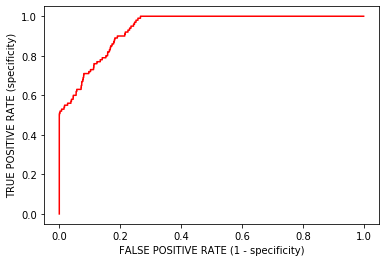

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('FALSE POSITIVE RATE (1 - specificity)')
plt.ylabel('TRUE POSITIVE RATE (specificity)')
plt.plot(np.array(sorted(fpr)),np.array(sorted(tpr)), color='red')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [482]:
 # write your code
# write your code
# write your code here
data = pd.read_csv("5_c.csv")
data.rename(columns={'y':'y_act'},inplace=True)
data.head(10)

,y_act,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [483]:
threshold =sorted(data['prob'].values, reverse = True)

In [484]:
data['y_pred'] = (data.prob >= threshold).astype('int')

In [485]:
data.head()

,y_act,prob,y_pred
0,0,0.458521,0
1,0,0.505037,0
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [486]:
data.tail()

,y_act,prob,y_pred
2847,1,0.491663,1
2848,1,0.292109,1
2849,1,0.659161,1
2850,1,0.456265,1
2851,1,0.659161,1


In [487]:
data.shape

(2852, 3)

In [488]:
data.dtypes

y_act       int64
prob      float64
y_pred      int32
dtype: object

In [489]:
# confusion matrix
def compute_confusion_matrix(yact,ypred):
    tp = sum((yact == 1) & (ypred == 1))
    tn = sum((yact == 0) & (ypred == 0))
    fn = sum((yact == 1) & (ypred == 0))
    fp = sum((yact == 0) & (ypred == 1))
    return tp,tn,fp,fn

In [490]:
tp,tn,fp,fn = compute_confusion_matrix(data.y_act, data.y_pred)
print(tp)
print(tn)
print(fp)
print(fn)

996
1401
404
51


In [491]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(data.y_act , data.y_pred).ravel() # converted 2d to 1d

In [492]:
print(tp)
print(tn)
print(fp)
print(fn)

996
1401
404
51


In [493]:
data.drop(columns = ['y_pred'], inplace = True)

print(data.head())

   y_act      prob
0      0  0.458521
1      0  0.505037
2      0  0.418652
3      0  0.412057
4      0  0.375579


In [517]:
data['threshold'] =sorted(data['prob'].values, reverse = True)

In [518]:
data.head()

,y_act,prob,pred,threshold
0,0,0.458521,0,0.957747
1,0,0.505037,0,0.951437
2,0,0.418652,0,0.948638
3,0,0.412057,0,0.944094
4,0,0.375579,0,0.941113


In [605]:
from tqdm import tqdm
d = {}
for i in tqdm(threshold):
    data['pred'] = data['prob'].apply(lambda x: 0 if x<i else 1)

    tp,tn,fp,fn = compute_confusion_matrix(data['y_act'],data['pred'])
    A = ((500*fn) + (100*fp))
    d = {'A':A, "threshold": threshold} # create a dictionary for two columns A and threshold
    























  0%|          | 0/2852 [00:00<?, ?it/s]





















  1%|          | 23/2852 [00:00<00:12, 229.32it/s]





















  2%|▏         | 46/2852 [00:00<00:12, 229.42it/s]





















  2%|▏         | 70/2852 [00:00<00:12, 230.67it/s]





















  3%|▎         | 94/2852 [00:00<00:11, 230.20it/s]





















  4%|▍         | 118/2852 [00:00<00:11, 230.58it/s]





















  5%|▍         | 141/2852 [00:00<00:11, 230.37it/s]





















  6%|▌         | 165/2852 [00:00<00:11, 231.32it/s]





















  7%|▋         | 188/2852 [00:00<00:11, 227.71it/s]





















  7%|▋         | 210/2852 [00:00<00:12, 220.12it/s]





















  8%|▊         | 233/2852 [00:01<00:11, 220.59it/s]





















  9%|▉         | 257/2852 [00:01<00:11, 224.34it/s]





















 10%|▉         | 280/2852 [00:01<00:11, 225.55it/s]





















 11%|█         | 304/2852 [00:01<00:11, 227.

 91%|█████████ | 2601/2852 [00:11<00:01, 219.38it/s]





















 92%|█████████▏| 2625/2852 [00:11<00:01, 223.15it/s]





















 93%|█████████▎| 2648/2852 [00:11<00:00, 221.76it/s]





















 94%|█████████▎| 2672/2852 [00:11<00:00, 223.87it/s]





















 95%|█████████▍| 2696/2852 [00:11<00:00, 225.31it/s]





















 95%|█████████▌| 2720/2852 [00:12<00:00, 226.78it/s]





















 96%|█████████▌| 2743/2852 [00:12<00:00, 227.69it/s]





















 97%|█████████▋| 2766/2852 [00:12<00:00, 228.19it/s]





















 98%|█████████▊| 2789/2852 [00:12<00:00, 226.09it/s]





















 99%|█████████▊| 2812/2852 [00:12<00:00, 225.43it/s]





















100%|██████████| 2852/2852 [00:12<00:00, 226.68it/s]


In [617]:
d = pd.DataFrame(d) # create data frame of d since it is easy to fetch the minimum value of A corresponding to threshold value
print(d)


           A  threshold
0     180500   0.957747
1896  180500   0.245252
1897  180500   0.244539
1898  180500   0.244460
1899  180500   0.244105
...      ...        ...
953   180500   0.443975
954   180500   0.443906
955   180500   0.443724
935   180500   0.446913
2851  180500   0.028038

[2852 rows x 2 columns]


In [618]:
d = d.sort_values(by = 'A')

In [620]:
print(min(d['threshold']))

0.02803798623987141


In [600]:
from tqdm import tqdm
d = {}    # create dictionary
for i in tqdm(threshold):
    data['pred'] = data['prob'].apply(lambda x: 0 if x<i else 1)

    tp,tn,fp,fn = compute_confusion_matrix(data['y_act'],data['pred'])
    A = ((500*fn) + (100*fp))
    d[i] = A   # here i is key and A is value  ==> d[key] = value























  0%|          | 0/2852 [00:00<?, ?it/s]





















  1%|          | 23/2852 [00:00<00:12, 228.27it/s]





















  2%|▏         | 46/2852 [00:00<00:12, 228.27it/s]





















  2%|▏         | 69/2852 [00:00<00:12, 227.79it/s]





















  3%|▎         | 93/2852 [00:00<00:12, 228.86it/s]





















  4%|▍         | 116/2852 [00:00<00:11, 228.21it/s]





















  5%|▍         | 140/2852 [00:00<00:11, 229.50it/s]





















  6%|▌         | 163/2852 [00:00<00:11, 228.76it/s]





















  7%|▋         | 187/2852 [00:00<00:11, 229.49it/s]





















  7%|▋         | 213/2852 [00:00<00:11, 233.18it/s]





















  8%|▊         | 236/2852 [00:01<00:11, 232.14it/s]





















  9%|▉         | 259/2852 [00:01<00:11, 227.87it/s]





















 10%|▉         | 283/2852 [00:01<00:11, 228.91it/s]





















 11%|█         | 306/2852 [00:01<00:11, 228.

 91%|█████████▏| 2605/2852 [00:11<00:01, 226.47it/s]





















 92%|█████████▏| 2628/2852 [00:11<00:00, 227.06it/s]





















 93%|█████████▎| 2651/2852 [00:11<00:00, 227.44it/s]





















 94%|█████████▍| 2675/2852 [00:11<00:00, 228.76it/s]





















 95%|█████████▍| 2698/2852 [00:11<00:00, 220.54it/s]





















 95%|█████████▌| 2721/2852 [00:11<00:00, 221.83it/s]





















 96%|█████████▋| 2746/2852 [00:12<00:00, 222.75it/s]





















 97%|█████████▋| 2770/2852 [00:12<00:00, 225.25it/s]





















 98%|█████████▊| 2793/2852 [00:12<00:00, 225.48it/s]





















 99%|█████████▉| 2817/2852 [00:12<00:00, 228.51it/s]





















100%|██████████| 2852/2852 [00:12<00:00, 227.21it/s]


In [601]:
print(min(d, key = d.get)) # this is to get key for the vaue which is minimum in all the values in the dictionary 
#corresponding to thresold values

0.2300390278970873


In [603]:
print(min(d)) # here it just gives the minimum value from the dictionary.
# but we want the best A value corresponding to threshrold value

0.02803798623987141


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [684]:
 # write your code
data = pd.read_csv("5_d.csv")
data.rename(columns={'y':'y_act'},inplace=True)
data.head(10) 
    

,y_act,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
5,133.0,153.0
6,148.0,139.0
7,172.0,145.0
8,153.0,162.0
9,162.0,154.0


## Mean Square Error 

In [694]:
#https://www.geeksforgeeks.org/python-mean-squared-error/
#Mean Square Error
MSE = np.square(np.subtract(data.y_act,data.pred)).mean() 
print(MSE)

177.16569974554707


## Modified_mean_absolute_percentage_error 

In [709]:
#https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
# Mean absolute percent error
#np.mean(np.abs((data.y_act - data.prob) / data.y_act)) * 100
def modified_mean_absolute_percentage_error(y_act, pred):
    y_act, pred = np.array(data.y_act), np.array(data.pred)
    return np.mean(np.abs((data.y_act - data.pred)/ np.mean(data.y_act))) * 100


In [711]:
modified_mean_absolute_percentage_error(data['y_act'], data['pred'])    

12.912029940096314

## R2_score

In [690]:
#https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
correlation_matrix = np.corrcoef(data.y_act, data.pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9563600409880488


In [691]:
from sklearn.metrics import r2_score
r2_score(data.y_act,data.pred)

0.9563582786990937

In [692]:
def get_r2_numpy_corrcoef(x, y):
    return np.corrcoef(x, y)[0, 1]**2

In [693]:
get_r2_numpy_corrcoef(data.y_act,data.pred)

0.9563600409880488